In [1]:
import pandas as pd
import missingno as msno
import numpy as np

%matplotlib inline

# Auslesen der Daten
df1 = pd.read_csv('wine_test.csv', sep=';')
df2 = pd.read_csv('wine_training.csv', sep=';')

# Zusammenführen der Daten
df3 = df1.append(df2)

/var/folders/44/l_1qszkn5sl032zlrtqpknwh0000gn/T/ipykernel_2019/761319578.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df1.append(df2)


In [2]:
#MS1: Data Exploration

In [3]:
# Umfang der Daten anzeigen lassen 
print("Umfang der Daten", df3.shape)

Umfang der Daten (4898, 18)


In [4]:
# Deskriptive Statisik berechnen lassen (2 mal für die Präsentation)
df3[['quality','density', 'pH', 'sulphates', 'residual sugar']].describe()
df3[['volatile acidity' , 'minerals', 'calcium']].describe()

,volatile acidity,minerals,calcium
count,4898.000000,4893.000000,4893.000000
mean,0.278241,284.938198,235.644071
std,0.100795,77.283606,71.769156
min,0.080000,11.582369,3.000000
25%,0.210000,232.335089,185.960000
50%,0.260000,283.982059,234.970000
75%,0.320000,337.197120,284.170000
max,1.100000,576.761262,514.520000


In [5]:
# Anzeigen der "Null"-Werte
df3.isnull()

,Unnamed: 0,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Zusammenrechnung der Null Werte
missing_values_count = df3.isna().sum()
print(missing_values_count)

Unnamed: 0              0
wine type               0
fixed acidity           0
volatile acidity        0
citric acid             5
residual sugar          5
magnesium               5
flavanoids              5
minerals                5
calcium                 5
chlorides               5
free sulfur dioxide     5
total sulfur dioxide    5
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# Asugeben aller Zeilen die fehlende Werte haben.

null_data = df3[df3.isnull().any(axis=1)]
null_data

# Zeile 14, 383, 1334, 1777, 2157 die nur einen NaN Wert haben 
# Zeile 887, 1715, 2024, 2649, 3781 diese Werte besitzen zu viele NaN Werte 

,Unnamed: 0,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,4014,Chardonnay,7.6,0.21,NaN,1.9,5.083269,1118.31,212.753269,207.67,0.036,10.0,119.0,0.99130,3.01,0.70,12.8,6
383,4383,Chardonnay,6.9,0.36,NaN,4.2,68.950393,936.19,260.070393,191.12,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
887,4887,Chardonnay,6.1,0.22,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99665,3.20,0.38,10.5,5
1334,1334,Chardonnay,6.4,0.13,NaN,1.6,96.924983,647.75,303.424983,206.50,0.092,40.0,158.0,0.99280,3.21,0.36,9.8,6
1715,1715,Chardonnay,7.2,0.35,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99334,2.93,0.66,10.3,7
1777,1777,Pinot noir,6.4,0.32,NaN,10.7,47.973891,725.24,286.333891,238.36,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,5
2024,2024,Chardonnay,6.5,0.23,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99828,3.15,0.42,9.2,6
2157,2157,Pinot noir,6.7,0.24,NaN,8.7,46.794182,694.52,249.224182,202.43,0.036,29.0,148.0,0.99520,3.22,0.62,9.9,6
2649,2649,Cabernet Sauvignon,7.7,0.39,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99180,3.19,0.58,12.2,7
3781,3781,Chardonnay,5.8,0.28,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.98952,3.32,0.60,12.5,7


<AxesSubplot:>

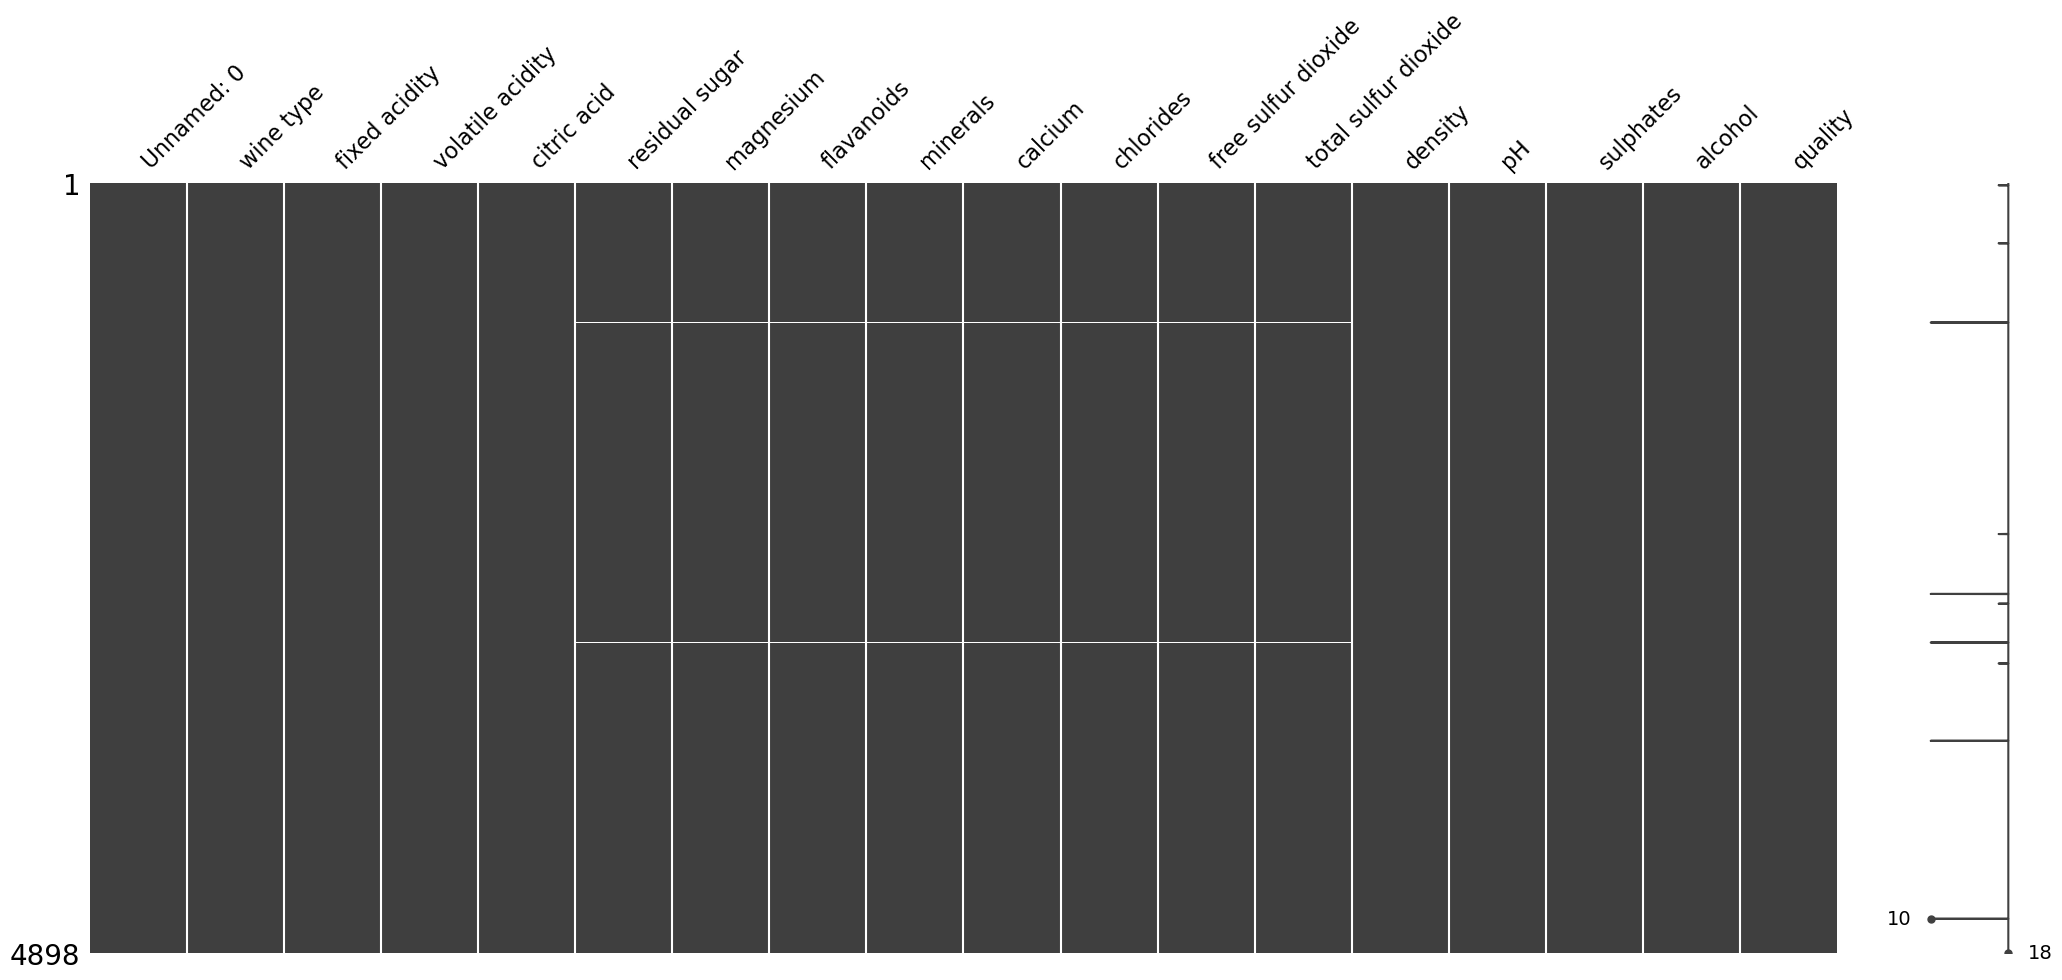

In [8]:
msno.matrix(df3)

<AxesSubplot:xlabel='quality'>

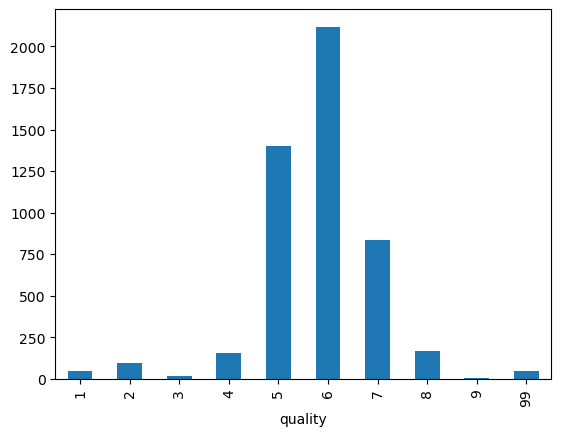

In [9]:
# Balkendiagramm um nach den Ausreißerwerten zu schauen
df3.groupby('quality').size().plot(kind='bar')

<AxesSubplot:>

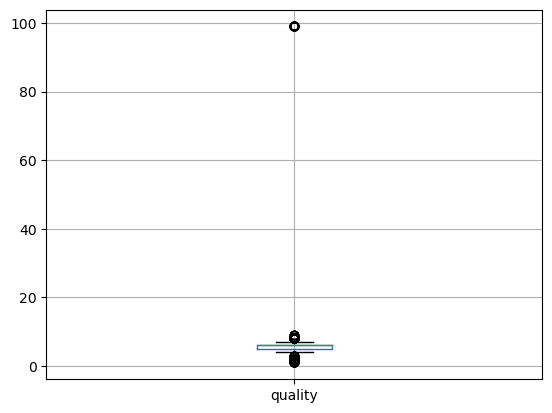

In [10]:
# Boxplot für Quality erstellen
df3.boxplot(column='quality')

<AxesSubplot:>

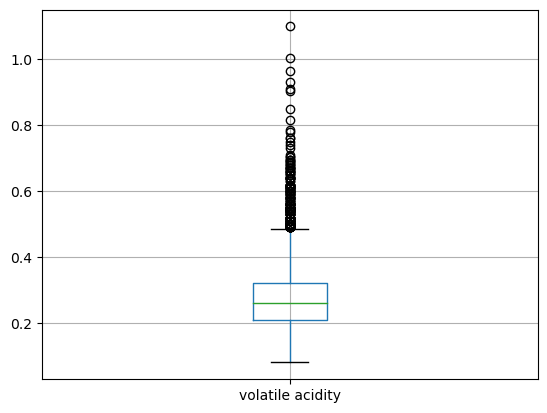

In [11]:
# Boxplot für volatile acidity erstellen
df3.boxplot(column='volatile acidity')

<AxesSubplot:>

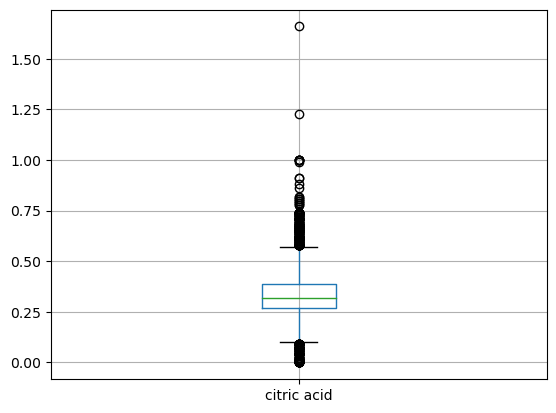

In [12]:
# Boxplot für citric acid erstellen
df3.boxplot(column='citric acid')

<AxesSubplot:>

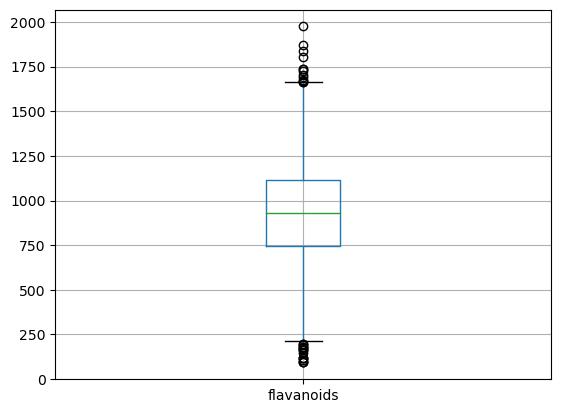

In [13]:
# Boxplot für flavanoids erstellen
df3.boxplot(column='flavanoids')

<AxesSubplot:>

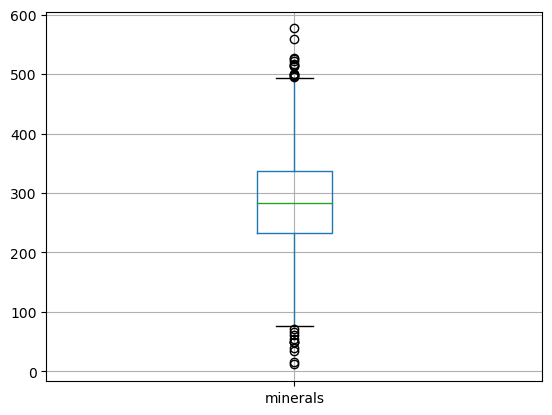

In [14]:
# Boxplot für minerals erstellen
df3.boxplot(column='minerals')

<AxesSubplot:>

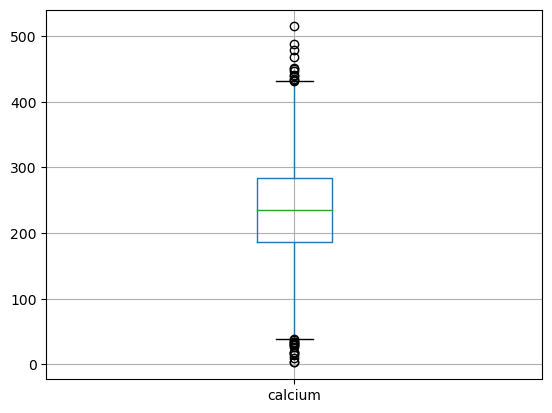

In [15]:
# Boxplot für calcium erstellen
df3.boxplot(column='calcium')

<AxesSubplot:>

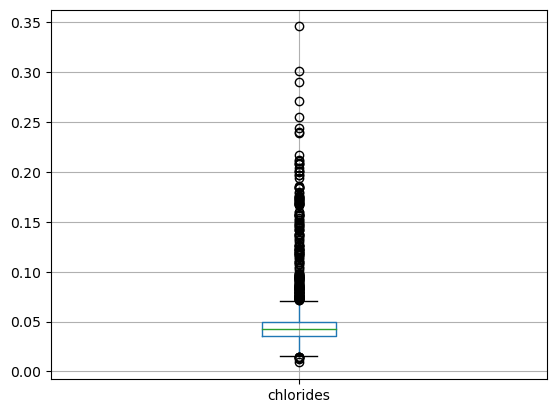

In [16]:
# Boxplot für chlorides erstellen
df3.boxplot(column='chlorides')

<AxesSubplot:>

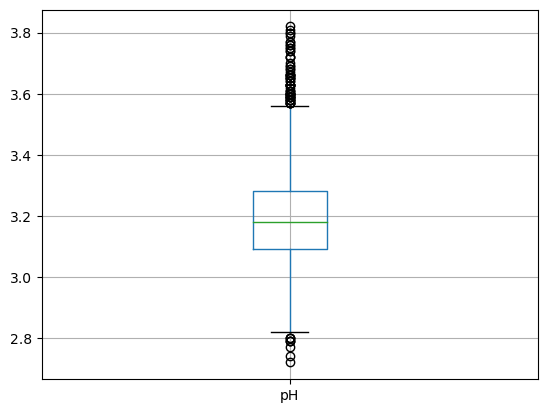

In [17]:
# Boxplot für pH erstellen 
df3.boxplot(column='pH')

<AxesSubplot:>

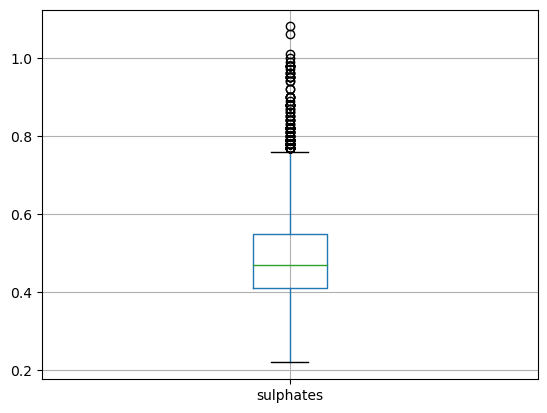

In [18]:
# Boxplot für sulphates erstellen
df3.boxplot(column='sulphates')

<AxesSubplot:>

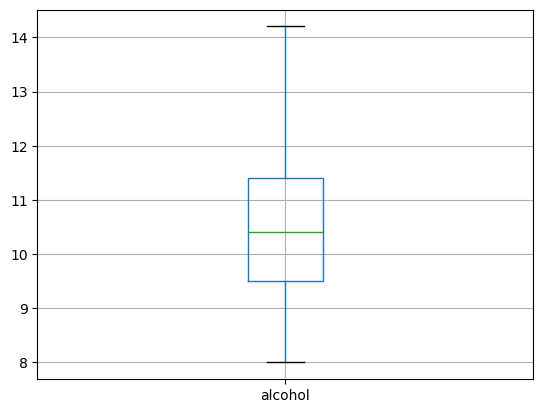

In [19]:
# Boxplot für alcohol erstellen 
df3.boxplot(column='alcohol')

<AxesSubplot:>

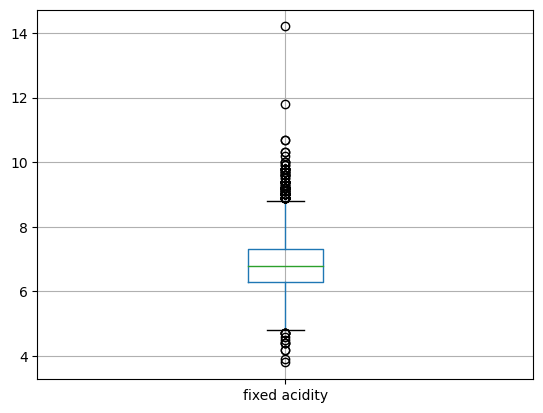

In [20]:
# Boxplot für fixed acidity erstellen 
df3.boxplot(column='fixed acidity')

<AxesSubplot:>

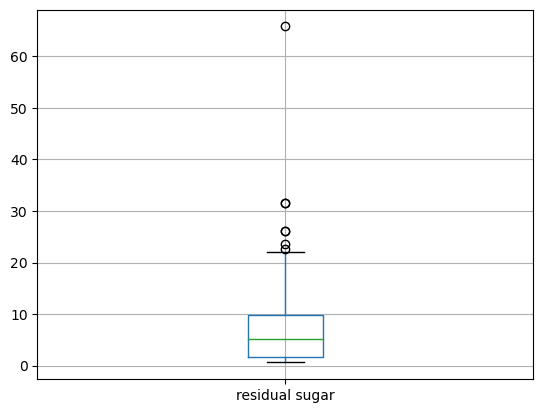

In [21]:
# Boxplot für residual sugar erstellen 
df3.boxplot(column='residual sugar')

<AxesSubplot:>

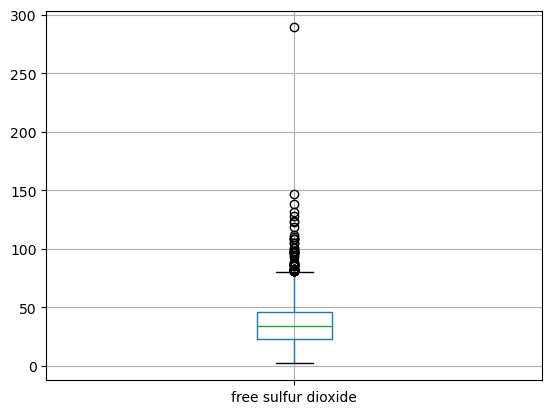

In [22]:
# Boxplot für free sulfur dioxide erstellen 
df3.boxplot(column='free sulfur dioxide')

<AxesSubplot:>

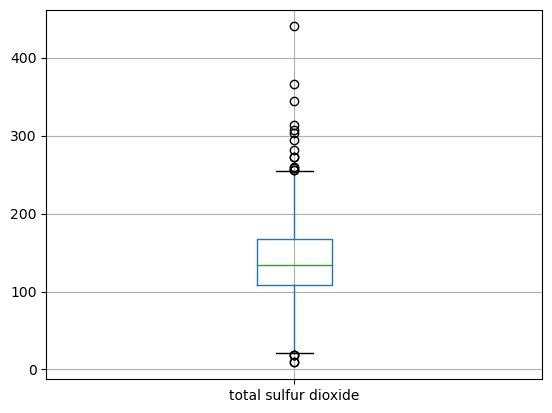

In [23]:
# Boxplot für total sulfur dioxide erstellen 
df3.boxplot(column='total sulfur dioxide')

<AxesSubplot:>

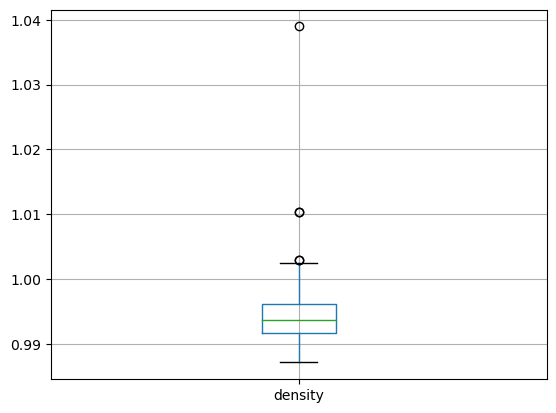

In [24]:
# Boxplot für density erstellen 
df3.boxplot(column='density')

In [25]:
# Korrelation anzeigen lassen
corr = df3.corr()
corr

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Unnamed: 0,1.000000,-0.004200,-0.009020,-0.003880,-0.016645,-0.009200,-0.009535,-0.021341,-0.019270,-0.013433,0.004109,-0.020457,-0.015430,0.020706,-0.000255,0.013176,-0.000975
fixed acidity,-0.004200,1.000000,-0.022697,0.289489,0.089521,-0.021735,-0.008775,-0.009558,-0.001525,0.023133,-0.049345,0.091077,0.265331,-0.425858,-0.017143,-0.120881,0.016775
volatile acidity,-0.009020,-0.022697,1.000000,-0.149209,0.064905,-0.002845,0.011262,-0.001800,-0.000791,0.070820,-0.096957,0.089442,0.027114,-0.031915,-0.035728,0.067718,-0.010729
citric acid,-0.003880,0.289489,-0.149209,1.000000,0.094855,0.017796,-0.011190,0.006489,-0.000188,0.114047,0.093915,0.120505,0.149591,-0.163513,0.061937,-0.075723,0.016278
residual sugar,-0.016645,0.089521,0.064905,0.094855,1.000000,-0.006396,-0.006206,-0.032713,-0.032646,0.088308,0.299498,0.402054,0.838949,-0.194202,-0.025756,-0.450468,-0.016069
magnesium,-0.009200,-0.021735,-0.002845,0.017796,-0.006396,1.000000,0.010318,0.370983,-0.003876,-0.003982,0.005314,-0.006831,0.003496,-0.003005,-0.017071,-0.024295,-0.017534
flavanoids,-0.009535,-0.008775,0.011262,-0.011190,-0.006206,0.010318,1.000000,-0.000364,-0.004554,-0.013469,-0.018860,-0.005283,-0.007291,-0.004516,0.007795,0.009118,0.002377
minerals,-0.021341,-0.009558,-0.001800,0.006489,-0.032713,0.370983,-0.000364,1.000000,0.927195,0.005601,-0.020426,-0.014931,-0.015018,0.011393,0.003886,0.003860,0.001719
calcium,-0.019270,-0.001525,-0.000791,-0.000188,-0.032646,-0.003876,-0.004554,0.927195,1.000000,0.007637,-0.024139,-0.013322,-0.017582,0.013480,0.011070,0.013956,0.008923
chlorides,-0.013433,0.023133,0.070820,0.114047,0.088308,-0.003982,-0.013469,0.005601,0.007637,1.000000,0.101175,0.198757,0.256913,-0.090558,0.017345,-0.360046,-0.036069


In [26]:
# Heatmap für die Korrelationen anzeigen lassen
corr.style.background_gradient(cmap ='coolwarm')

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Unnamed: 0,1.000000,-0.004200,-0.009020,-0.003880,-0.016645,-0.009200,-0.009535,-0.021341,-0.019270,-0.013433,0.004109,-0.020457,-0.015430,0.020706,-0.000255,0.013176,-0.000975
fixed acidity,-0.004200,1.000000,-0.022697,0.289489,0.089521,-0.021735,-0.008775,-0.009558,-0.001525,0.023133,-0.049345,0.091077,0.265331,-0.425858,-0.017143,-0.120881,0.016775
volatile acidity,-0.009020,-0.022697,1.000000,-0.149209,0.064905,-0.002845,0.011262,-0.001800,-0.000791,0.070820,-0.096957,0.089442,0.027114,-0.031915,-0.035728,0.067718,-0.010729
citric acid,-0.003880,0.289489,-0.149209,1.000000,0.094855,0.017796,-0.011190,0.006489,-0.000188,0.114047,0.093915,0.120505,0.149591,-0.163513,0.061937,-0.075723,0.016278
residual sugar,-0.016645,0.089521,0.064905,0.094855,1.000000,-0.006396,-0.006206,-0.032713,-0.032646,0.088308,0.299498,0.402054,0.838949,-0.194202,-0.025756,-0.450468,-0.016069
magnesium,-0.009200,-0.021735,-0.002845,0.017796,-0.006396,1.000000,0.010318,0.370983,-0.003876,-0.003982,0.005314,-0.006831,0.003496,-0.003005,-0.017071,-0.024295,-0.017534
flavanoids,-0.009535,-0.008775,0.011262,-0.011190,-0.006206,0.010318,1.000000,-0.000364,-0.004554,-0.013469,-0.018860,-0.005283,-0.007291,-0.004516,0.007795,0.009118,0.002377
minerals,-0.021341,-0.009558,-0.001800,0.006489,-0.032713,0.370983,-0.000364,1.000000,0.927195,0.005601,-0.020426,-0.014931,-0.015018,0.011393,0.003886,0.003860,0.001719
calcium,-0.019270,-0.001525,-0.000791,-0.000188,-0.032646,-0.003876,-0.004554,0.927195,1.000000,0.007637,-0.024139,-0.013322,-0.017582,0.013480,0.011070,0.013956,0.008923
chlorides,-0.013433,0.023133,0.070820,0.114047,0.088308,-0.003982,-0.013469,0.005601,0.007637,1.000000,0.101175,0.198757,0.256913,-0.090558,0.017345,-0.360046,-0.036069


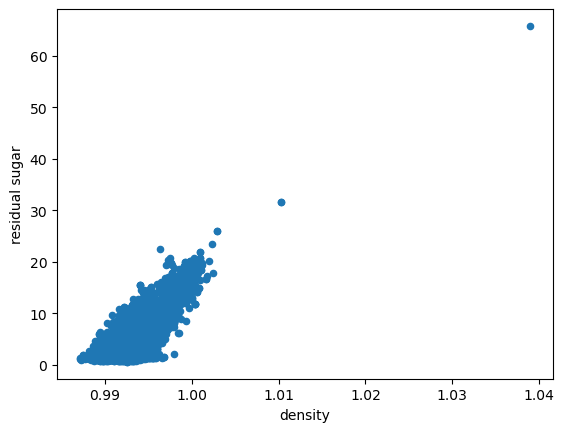

In [27]:
# Scattermap für density und residual sugar erstellen
scatter = df3.plot.scatter(x='density', y='residual sugar',sharex=False)

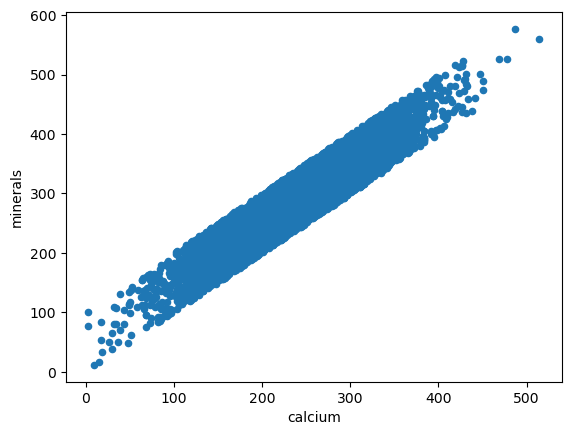

In [28]:
# Scattermap für calcium und minerals erstellen
scatter = df3.plot.scatter(x='calcium', y='minerals',sharex=False)

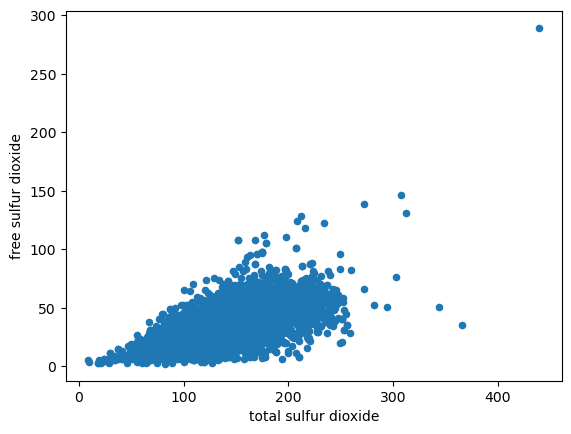

In [29]:
# Scattermap für total sulfur und free sulfur dioxide ersellen
scatter = df3.plot.scatter(x='total sulfur dioxide', y='free sulfur dioxide',sharex=False)

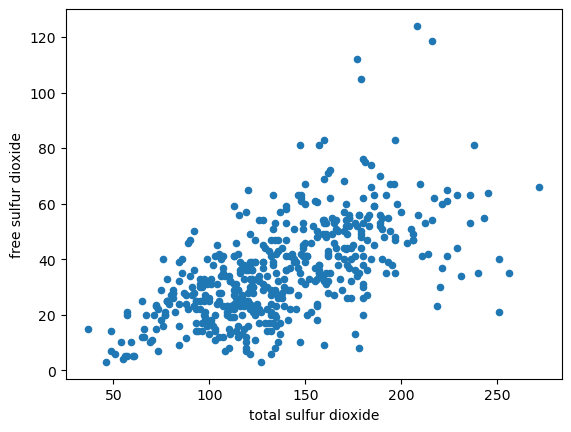

In [30]:
# Scattermap für total und free sulfur dioxide mit n = 500 erstellen
scatter = df3.iloc[:500].plot.scatter(x='total sulfur dioxide', y='free sulfur dioxide',sharex=False)

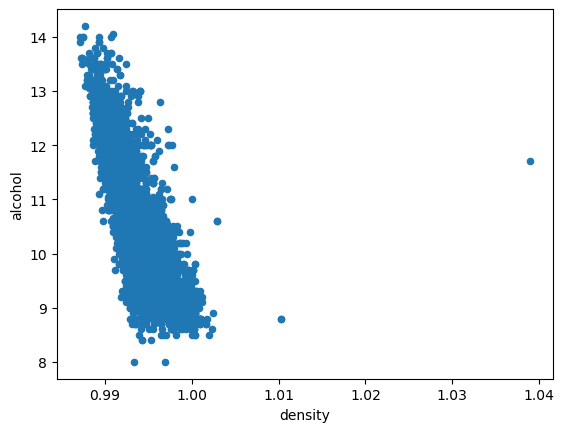

In [31]:
# Scattermap für density und alcohol erstellen
scatter = df3.plot.scatter(x='density', y='alcohol',sharex=False)

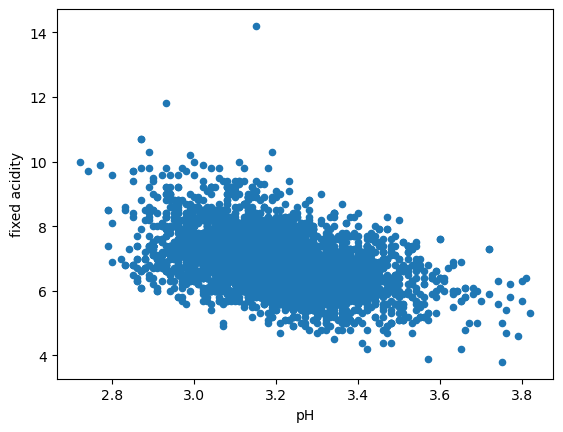

In [32]:
# Scattermap für pH und fixed acidity erstellen
scatter = df3.plot.scatter(x='pH', y='fixed acidity',sharex=False)

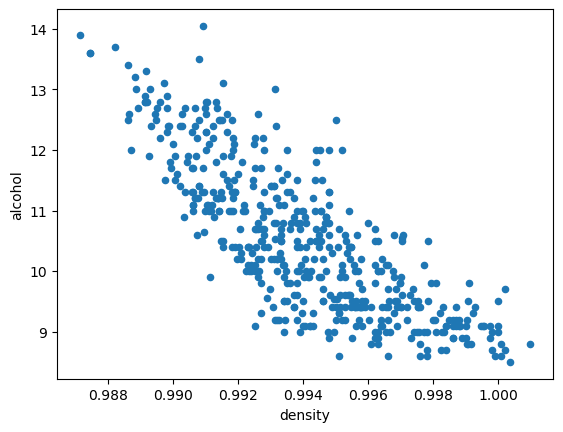

In [33]:
# Scattermap Scattermap für density und alcohol mit n = 500 erstellen
scatter = df3.iloc[:500].plot.scatter(x='density', y='alcohol',sharex=False)

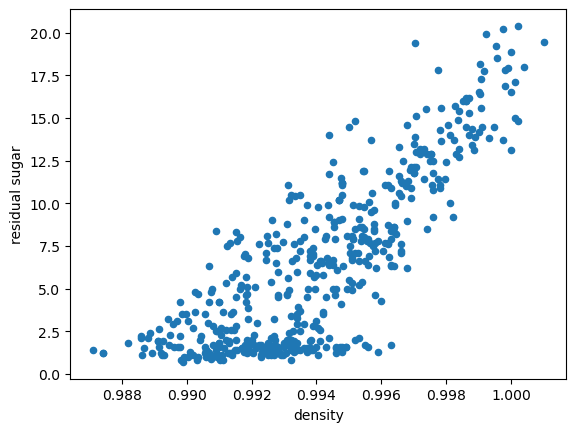

In [34]:
# Scattermap Scattermap für density und residual sugar mit n = 500 erstellen
scatter = df3.iloc[:500].plot.scatter(x='density', y='residual sugar',sharex=False)

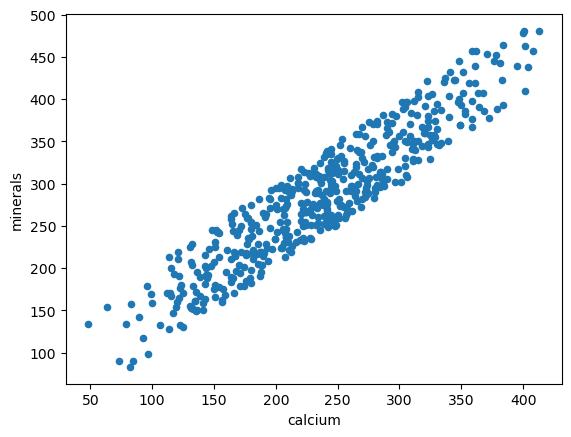

In [35]:
# Scattermap Scattermap für calcium und minerals mit n = 500 erstellen
scatter = df3.iloc[:500].plot.scatter(x='calcium', y='minerals',sharex=False)

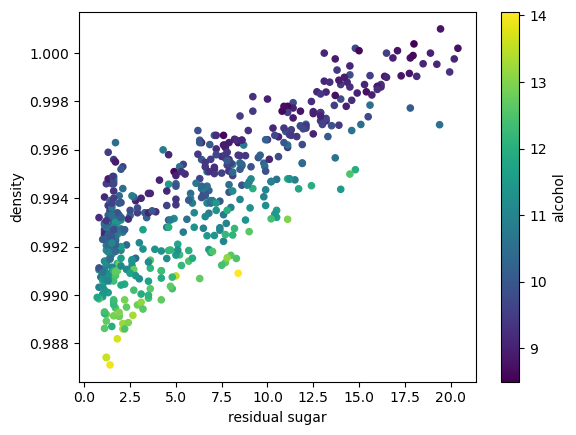

In [36]:
# Scattermap von residual sugar, density und alcohol mit n=500 erstellen
scatter = df3.iloc[:500].plot.scatter(x='residual sugar', y='density',c='alcohol',colormap='viridis',sharex=False)

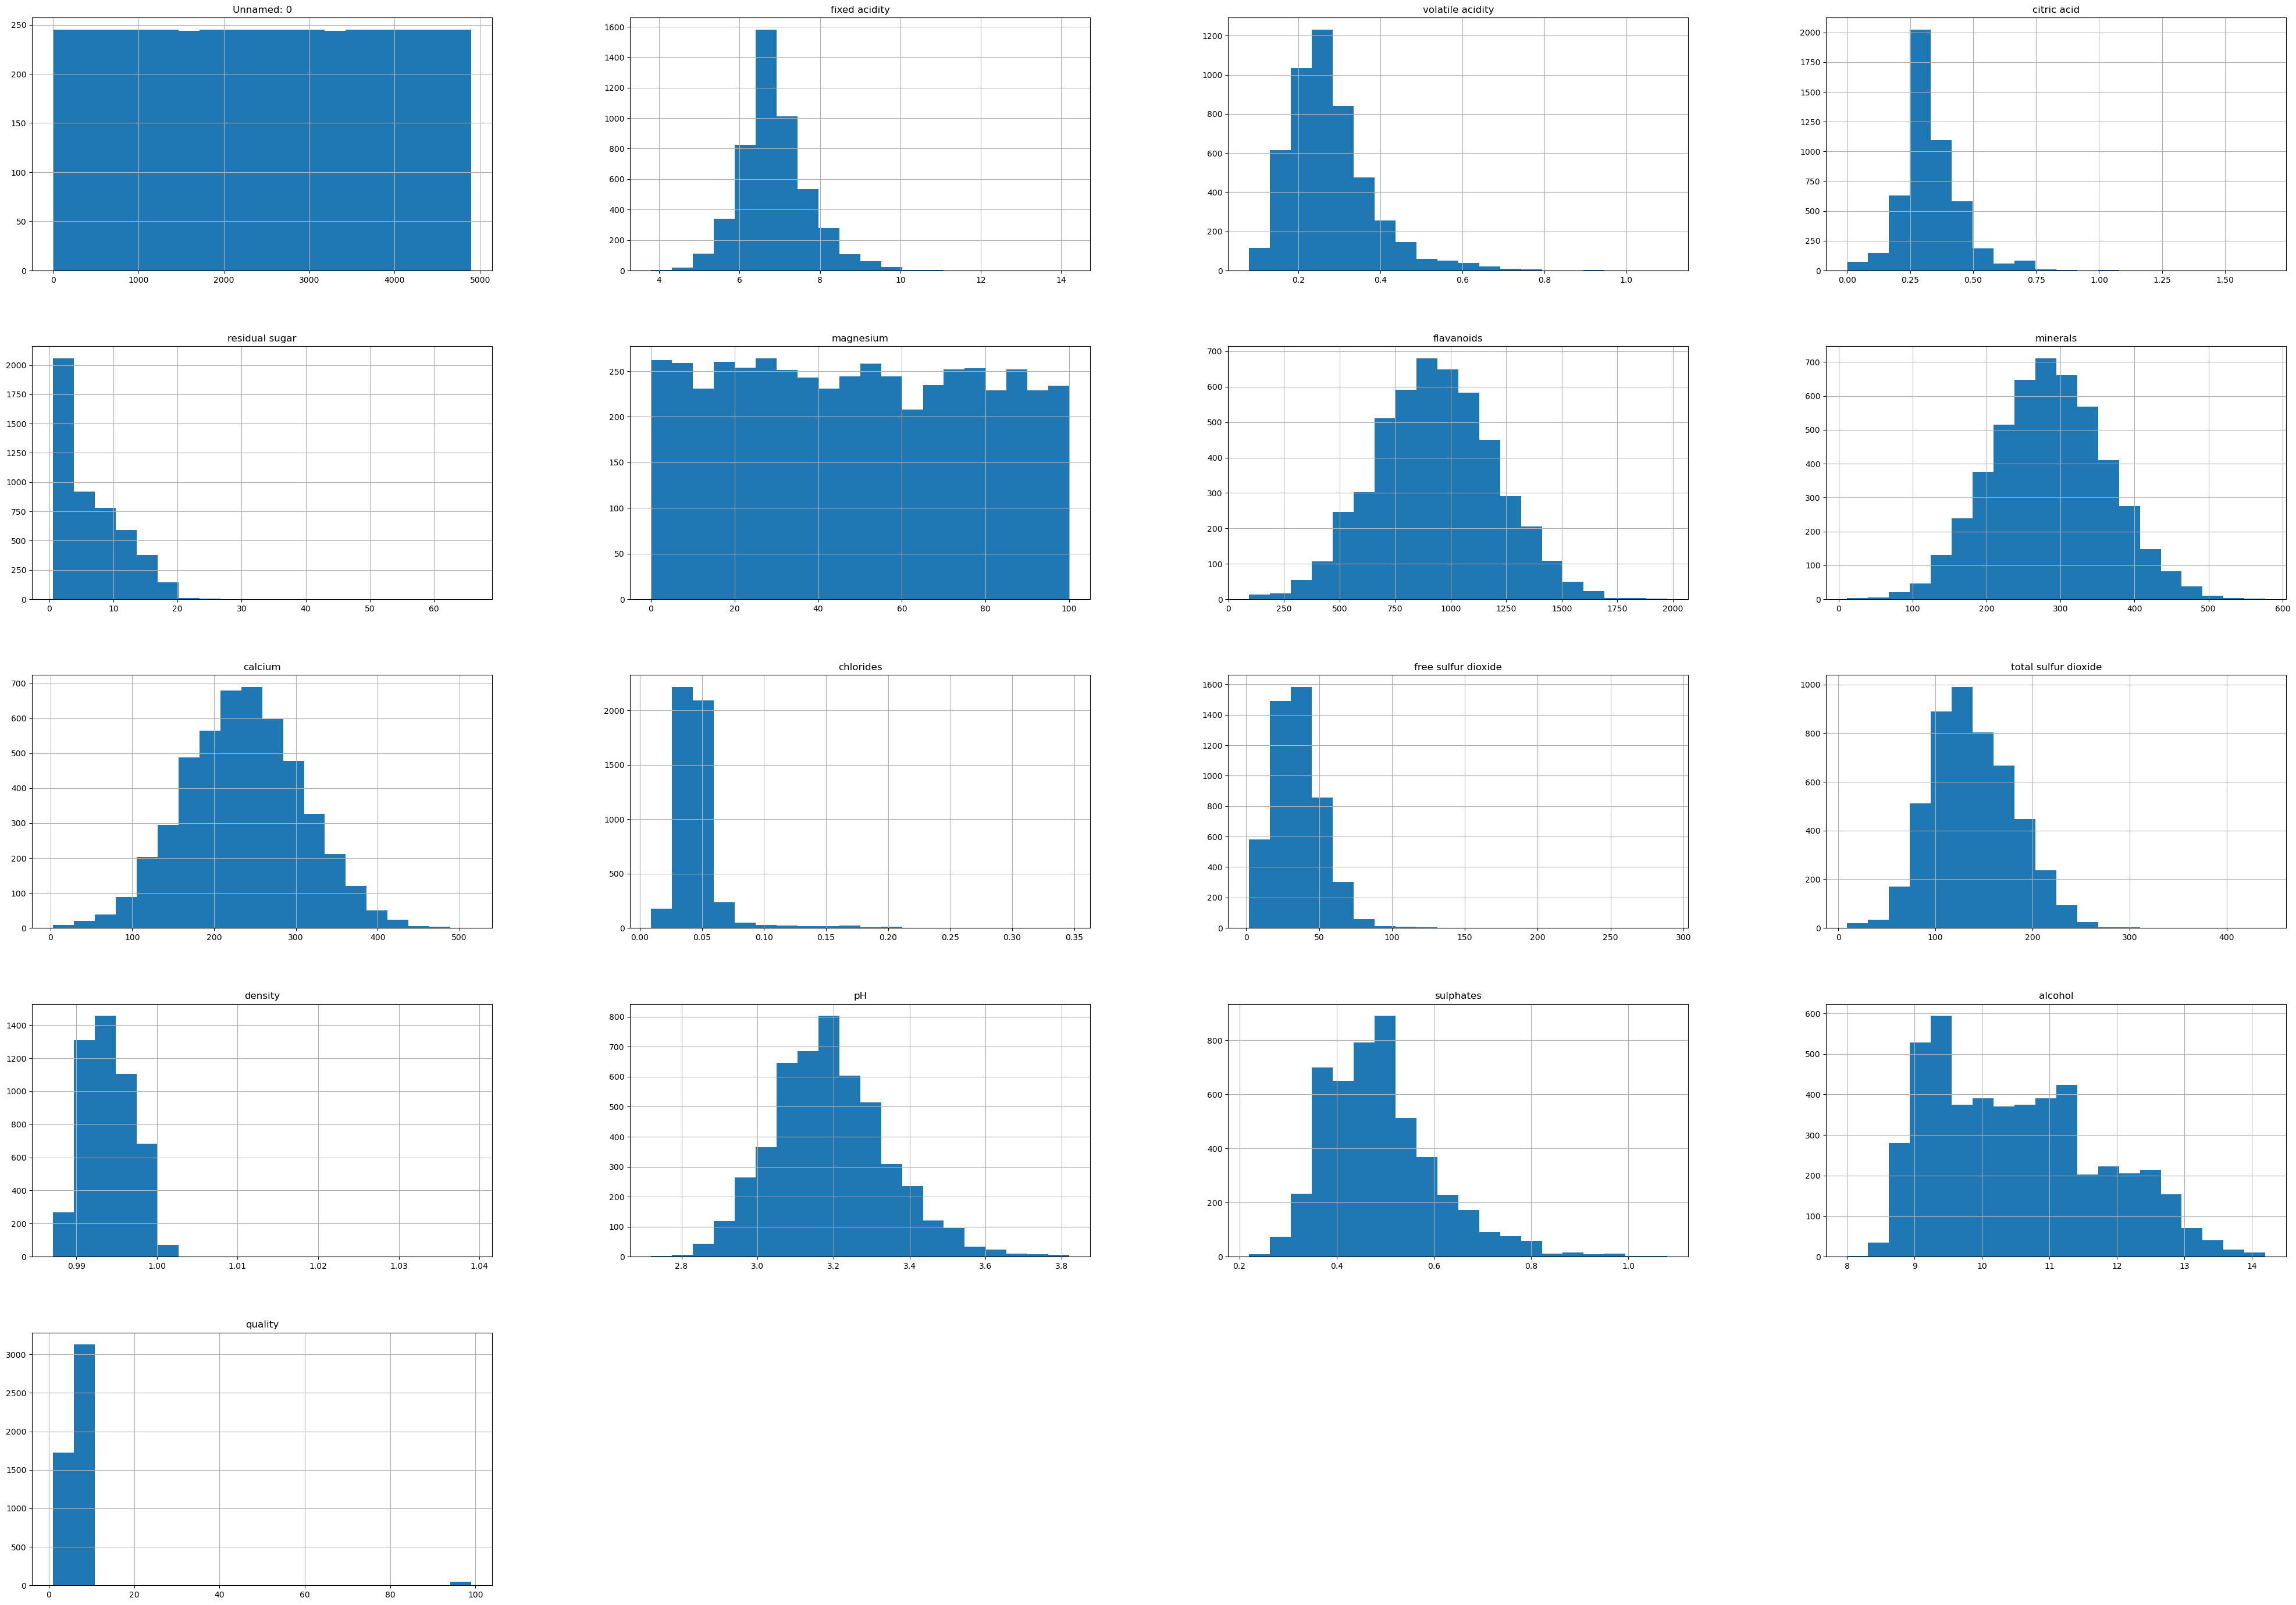

In [37]:
# Alle Histogramme anzeigen lassen
hist1 = df3.iloc[:].hist(bins=20, figsize=(50, 35))

In [38]:
# Hier wird durch den Dataframe iteriert um alle Ausreißer und ihr zugehöriges Merkmal anzeigen zu lassen
import numpy as np

# Iteration über Spalten im DataFrame
for column_name in df3.columns:
    column_data = df3[column_name]
    if np.issubdtype(column_data.dtype, np.number):  # Überprüfen, ob der Datentyp numerisch ist
        three_std = column_data.std() * 3
        mean = column_data.mean()

        inlier_low = mean - three_std
        inlier_high = mean + three_std
        
        outlier_count = 0

        # Iteration über Werte in der Spalte mit Zeilennummer
        for i, value in enumerate(column_data):
            if value < inlier_low or value > inlier_high:
                outlier_count += 1  
                print(f"Value {value} in row {i+1} of column {column_name} is a potential outlier")
        print("Anzahl der Ausreißerwerte: ", outlier_count)

Anzahl der Ausreißerwerte:  0
Value 9.6 in row 45 of column fixed acidity is a potential outlier
Value 9.4 in row 111 of column fixed acidity is a potential outlier
Value 9.5 in row 168 of column fixed acidity is a potential outlier
Value 9.4 in row 353 of column fixed acidity is a potential outlier
Value 10.2 in row 466 of column fixed acidity is a potential outlier
Value 14.2 in row 506 of column fixed acidity is a potential outlier
Value 9.4 in row 680 of column fixed acidity is a potential outlier
Value 10.3 in row 733 of column fixed acidity is a potential outlier
Value 9.7 in row 741 of column fixed acidity is a potential outlier
Value 9.7 in row 933 of column fixed acidity is a potential outlier
Value 10.7 in row 936 of column fixed acidity is a potential outlier
Value 9.7 in row 1016 of column fixed acidity is a potential outlier
Value 9.8 in row 1025 of column fixed acidity is a potential outlier
Value 10.0 in row 1048 of column fixed acidity is a potential outlier
Value 9.6 i

In [39]:
#Skewness für die einzelnen Merkmale berechnen lassen
df_skew=pd.DataFrame(df3.skew())
df_skew=df_skew.transpose()
df_skew

/var/folders/44/l_1qszkn5sl032zlrtqpknwh0000gn/T/ipykernel_2019/1703207852.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_skew=pd.DataFrame(df3.skew())


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.0,0.647751,1.57698,1.284432,1.077932,0.034204,0.033319,0.039782,0.032067,5.022894,1.406942,0.389369,0.977773,0.457783,0.977194,0.487342,9.728249


In [40]:
# Dieser optionale Code war für die Untersuchung der Weintypen. Hier wurde bis auf die Anzahl der Typen allerdings keine Auffälligkeiten gefunden
# hier wurde eine Tabelle zur visualisierung der Weinttypen und derrer Anzahl erstellt
counts2 = df3['wine type'].value_counts()
print(counts2)
df_winetypes1= pd.DataFrame(counts2)
#df_winetypes= df_winetypes.transpose()
df_winetypes1['code']= [1, 2, 3, 4, 5]
df_winetypes1


Chardonnay            1209
Merlot                1188
Cabernet Sauvignon    1184
Pinot noir            1171
Gamay                  146
Name: wine type, dtype: int64


,wine type,code
Chardonnay,1209,1
Merlot,1188,2
Cabernet Sauvignon,1184,3
Pinot noir,1171,4
Gamay,146,5


array([[<AxesSubplot:title={'center':'wine type code'}>]], dtype=object)

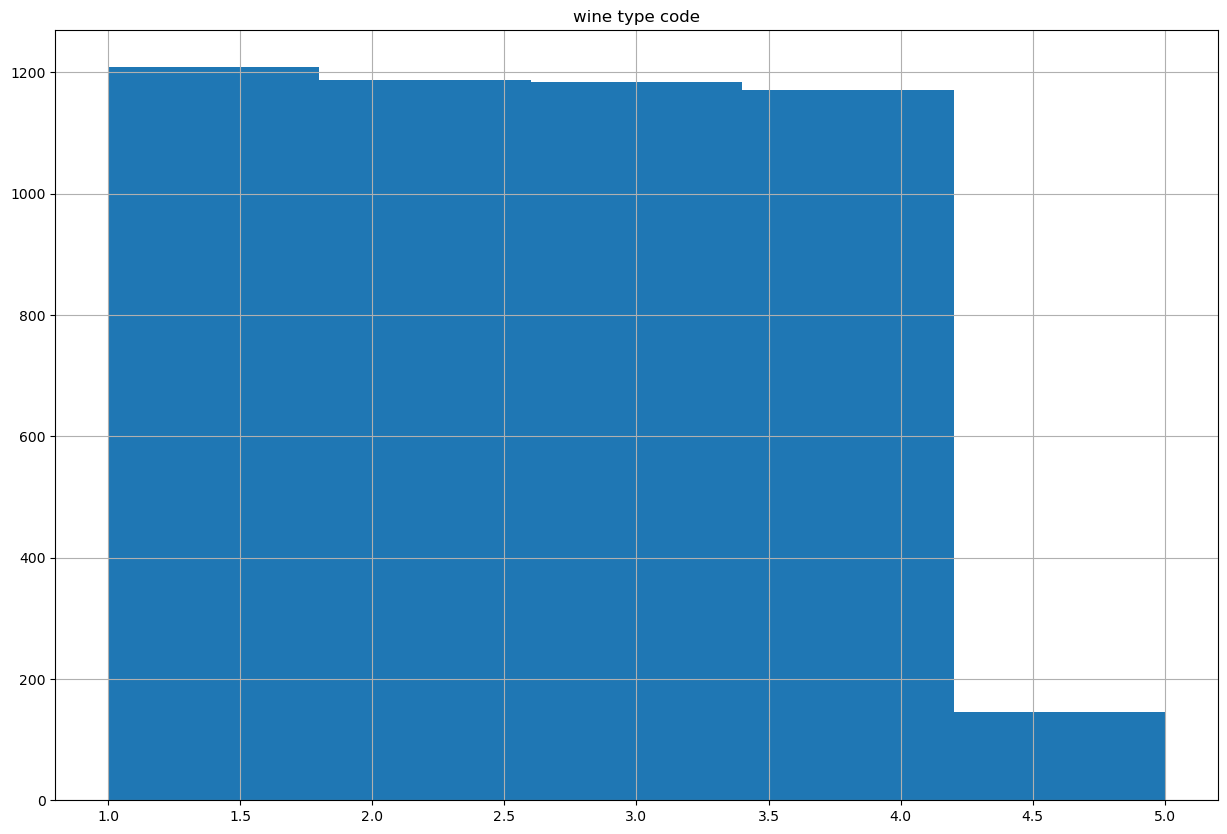

In [41]:
# Dieser optionale Code war für die Untersuchung der Weintypen. Hier wurde bis auf die Anzahl der Typen allerdings keine Auffälligkeiten gefunden
# hier wurde ein Histogramm zur visualisierung der Weinttypen und derrer Anzahl erstellt

df_winetyptest=pd.DataFrame(df3)
type_dict = {'Chardonnay': 1, 'Merlot':2, 'Cabernet Sauvignon':3, 'Pinot noir':4, 'Gamay':5}
df_winetyptest['wine type code'] = df_winetyptest['wine type'].map(type_dict)
df_winetyptest
hist2 = df_winetyptest.hist(column='wine type code', bins=5, figsize=(15, 10))
hist2


In [42]:
# Anzeigen der Korrelationen inklusive des codes für die Weintypen 
corr = df3.corr()
corr.style.background_gradient(cmap ='coolwarm')
corr

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type code
Unnamed: 0,1.000000,-0.004200,-0.009020,-0.003880,-0.016645,-0.009200,-0.009535,-0.021341,-0.019270,-0.013433,0.004109,-0.020457,-0.015430,0.020706,-0.000255,0.013176,-0.000975,-0.009850
fixed acidity,-0.004200,1.000000,-0.022697,0.289489,0.089521,-0.021735,-0.008775,-0.009558,-0.001525,0.023133,-0.049345,0.091077,0.265331,-0.425858,-0.017143,-0.120881,0.016775,-0.000551
volatile acidity,-0.009020,-0.022697,1.000000,-0.149209,0.064905,-0.002845,0.011262,-0.001800,-0.000791,0.070820,-0.096957,0.089442,0.027114,-0.031915,-0.035728,0.067718,-0.010729,-0.025273
citric acid,-0.003880,0.289489,-0.149209,1.000000,0.094855,0.017796,-0.011190,0.006489,-0.000188,0.114047,0.093915,0.120505,0.149591,-0.163513,0.061937,-0.075723,0.016278,0.003533
residual sugar,-0.016645,0.089521,0.064905,0.094855,1.000000,-0.006396,-0.006206,-0.032713,-0.032646,0.088308,0.299498,0.402054,0.838949,-0.194202,-0.025756,-0.450468,-0.016069,0.003858
magnesium,-0.009200,-0.021735,-0.002845,0.017796,-0.006396,1.000000,0.010318,0.370983,-0.003876,-0.003982,0.005314,-0.006831,0.003496,-0.003005,-0.017071,-0.024295,-0.017534,0.003322
flavanoids,-0.009535,-0.008775,0.011262,-0.011190,-0.006206,0.010318,1.000000,-0.000364,-0.004554,-0.013469,-0.018860,-0.005283,-0.007291,-0.004516,0.007795,0.009118,0.002377,-0.026229
minerals,-0.021341,-0.009558,-0.001800,0.006489,-0.032713,0.370983,-0.000364,1.000000,0.927195,0.005601,-0.020426,-0.014931,-0.015018,0.011393,0.003886,0.003860,0.001719,-0.006317
calcium,-0.019270,-0.001525,-0.000791,-0.000188,-0.032646,-0.003876,-0.004554,0.927195,1.000000,0.007637,-0.024139,-0.013322,-0.017582,0.013480,0.011070,0.013956,0.008923,-0.008142
chlorides,-0.013433,0.023133,0.070820,0.114047,0.088308,-0.003982,-0.013469,0.005601,0.007637,1.000000,0.101175,0.198757,0.256913,-0.090558,0.017345,-0.360046,-0.036069,0.009968


In [43]:
# ----------------- MS2: Data Transformation ----------------------

In [44]:
!pip install missingno

In [45]:
import pandas as pd
import missingno as msno
import numpy as np

%matplotlib inline

# Auslesen der Daten
df1 = pd.read_csv('wine_test.csv', sep=';')
df2 = pd.read_csv('wine_training.csv', sep=';')

In [46]:
# Anzeigen des DataSets der Trainingsdaten
df2

,Unnamed: 0,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,Pinot noir,5.8,0.15,0.49,1.1,76.729301,894.94,186.639301,109.91,0.048,21.0,98.0,0.99290,3.19,0.48,9.2,5
1,1,Merlot,6.6,0.25,0.32,5.6,4.795712,1160.95,251.875712,247.08,0.039,15.0,68.0,0.99163,2.96,0.52,11.1,6
2,2,Chardonnay,6.7,0.21,0.34,1.5,85.193710,789.82,304.703710,219.51,0.035,45.0,123.0,0.98949,3.24,0.36,12.6,7
3,3,Merlot,8.3,0.28,0.27,17.5,11.976525,777.86,237.586525,225.61,0.045,48.0,253.0,1.00014,3.02,0.56,9.1,6
4,4,Merlot,7.5,0.42,0.19,6.9,5.599673,785.72,95.399673,89.80,0.041,62.0,150.0,0.99508,3.23,0.37,10.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,Cabernet Sauvignon,6.4,0.23,0.37,7.9,92.701914,1143.32,318.791914,226.09,0.050,60.0,150.0,0.99488,2.86,0.49,9.3,6
3996,3996,Cabernet Sauvignon,7.0,0.22,0.26,9.2,94.807955,863.32,322.107955,227.30,0.027,37.0,122.0,0.99228,3.06,0.34,12.5,8
3997,3997,Merlot,7.5,0.26,0.30,4.6,50.112474,831.67,360.872474,310.76,0.027,29.0,92.0,0.99085,3.15,0.38,12.0,7
3998,3998,Chardonnay,6.3,0.43,0.32,8.8,84.805688,1300.32,328.915688,244.11,0.042,18.0,106.0,0.99172,3.28,0.33,12.9,7


In [47]:
# --- Minimal Preprocessing des Trainingsdatensatzes ---
# Das heißt, dass nur Missing-value-handling durchgeführt wird
# citric_acid: Zeilen 383, 1334, 1777, 2157 ersetzen

# Median von citric_acid bestimmen
median = df2['citric acid'].median()

# Fehlende Werte mit dem Median ersetzen
df2['citric acid'] = df2['citric acid'].fillna(median)
# Test, ob citric acid ersetzt wurde
null_rows = df2[df2.isnull().any(axis=1)]
print(null_rows)

      Unnamed: 0           wine type  fixed acidity  volatile acidity  \
1715        1715          Chardonnay            7.2              0.35   
2024        2024          Chardonnay            6.5              0.23   
2649        2649  Cabernet Sauvignon            7.7              0.39   
3781        3781          Chardonnay            5.8              0.28   

      citric acid  residual sugar  magnesium  flavanoids  minerals  calcium  \
1715         0.25             NaN        NaN         NaN       NaN      NaN   
2024         0.25             NaN        NaN         NaN       NaN      NaN   
2649         0.28             NaN        NaN         NaN       NaN      NaN   
3781         0.30             NaN        NaN         NaN       NaN      NaN   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1715        NaN                  NaN                   NaN  0.99334  2.93   
2024        NaN                  NaN                   NaN  0.99828  3.15   
2649   

In [48]:
# --- Minimal Preprocessing des Testdatensatzes ---
# Das heißt, dass nur Missing-value-handling durchgeführt wird

# Median von citric_acid bestimmen
median = df1['citric acid'].median()

# Fehlende Werte mit dem Median ersetzen
df1['citric acid'] = df1['citric acid'].fillna(median)
# Test, ob citric acid ersetzt wurde
null_rows = df1[df1.isnull().any(axis=1)]
print(null_rows)

     Unnamed: 0   wine type  fixed acidity  volatile acidity  citric acid  \
887        4887  Chardonnay            6.1              0.22         0.28   

     residual sugar  magnesium  flavanoids  minerals  calcium  chlorides  \
887             NaN        NaN         NaN       NaN      NaN        NaN   

     free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
887                  NaN                   NaN  0.99665  3.2       0.38   

     alcohol  quality  
887     10.5        5  


In [49]:
#One hot encoding des wine-types in den Trainingsdaten df2
wine_type_oh_encoded_training = pd.get_dummies(df2['wine type'])
wine_type_oh_encoded_training

,Cabernet Sauvignon,Chardonnay,Gamay,Merlot,Pinot noir
0,0,0,0,0,1
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
3995,1,0,0,0,0
3996,1,0,0,0,0
3997,0,0,0,1,0
3998,0,1,0,0,0


In [50]:
#One hot encoding des wine-types zu den Trainingsdaten hinzufügen
df2 = df2.join(wine_type_oh_encoded_training)
# alten wine type aus dem df löschen
df2 = df2.drop('wine type', axis=1)
df2

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,...,density,pH,sulphates,alcohol,quality,Cabernet Sauvignon,Chardonnay,Gamay,Merlot,Pinot noir
0,0,5.8,0.15,0.49,1.1,76.729301,894.94,186.639301,109.91,0.048,...,0.99290,3.19,0.48,9.2,5,0,0,0,0,1
1,1,6.6,0.25,0.32,5.6,4.795712,1160.95,251.875712,247.08,0.039,...,0.99163,2.96,0.52,11.1,6,0,0,0,1,0
2,2,6.7,0.21,0.34,1.5,85.193710,789.82,304.703710,219.51,0.035,...,0.98949,3.24,0.36,12.6,7,0,1,0,0,0
3,3,8.3,0.28,0.27,17.5,11.976525,777.86,237.586525,225.61,0.045,...,1.00014,3.02,0.56,9.1,6,0,0,0,1,0
4,4,7.5,0.42,0.19,6.9,5.599673,785.72,95.399673,89.80,0.041,...,0.99508,3.23,0.37,10.0,6,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,6.4,0.23,0.37,7.9,92.701914,1143.32,318.791914,226.09,0.050,...,0.99488,2.86,0.49,9.3,6,1,0,0,0,0
3996,3996,7.0,0.22,0.26,9.2,94.807955,863.32,322.107955,227.30,0.027,...,0.99228,3.06,0.34,12.5,8,1,0,0,0,0
3997,3997,7.5,0.26,0.30,4.6,50.112474,831.67,360.872474,310.76,0.027,...,0.99085,3.15,0.38,12.0,7,0,0,0,1,0
3998,3998,6.3,0.43,0.32,8.8,84.805688,1300.32,328.915688,244.11,0.042,...,0.99172,3.28,0.33,12.9,7,0,1,0,0,0


In [51]:
# Label Quality in den Testdaten wieder an letzte Stelle verschieben
col_quality = df2['quality']
df2.drop('quality', axis=1, inplace=True)
df2['quality'] = col_quality
df2

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,...,density,pH,sulphates,alcohol,Cabernet Sauvignon,Chardonnay,Gamay,Merlot,Pinot noir,quality
0,0,5.8,0.15,0.49,1.1,76.729301,894.94,186.639301,109.91,0.048,...,0.99290,3.19,0.48,9.2,0,0,0,0,1,5
1,1,6.6,0.25,0.32,5.6,4.795712,1160.95,251.875712,247.08,0.039,...,0.99163,2.96,0.52,11.1,0,0,0,1,0,6
2,2,6.7,0.21,0.34,1.5,85.193710,789.82,304.703710,219.51,0.035,...,0.98949,3.24,0.36,12.6,0,1,0,0,0,7
3,3,8.3,0.28,0.27,17.5,11.976525,777.86,237.586525,225.61,0.045,...,1.00014,3.02,0.56,9.1,0,0,0,1,0,6
4,4,7.5,0.42,0.19,6.9,5.599673,785.72,95.399673,89.80,0.041,...,0.99508,3.23,0.37,10.0,0,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,6.4,0.23,0.37,7.9,92.701914,1143.32,318.791914,226.09,0.050,...,0.99488,2.86,0.49,9.3,1,0,0,0,0,6
3996,3996,7.0,0.22,0.26,9.2,94.807955,863.32,322.107955,227.30,0.027,...,0.99228,3.06,0.34,12.5,1,0,0,0,0,8
3997,3997,7.5,0.26,0.30,4.6,50.112474,831.67,360.872474,310.76,0.027,...,0.99085,3.15,0.38,12.0,0,0,0,1,0,7
3998,3998,6.3,0.43,0.32,8.8,84.805688,1300.32,328.915688,244.11,0.042,...,0.99172,3.28,0.33,12.9,0,1,0,0,0,7


In [52]:
#One hot encoding des wine-types in den testdaten df1
wine_type_oh_encoded_test = pd.get_dummies(df1['wine type'])
wine_type_oh_encoded_test

,Cabernet Sauvignon,Chardonnay,Gamay,Merlot,Pinot noir
0,1,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
893,0,1,0,0,0
894,0,0,0,1,0
895,1,0,0,0,0
896,0,1,0,0,0


In [53]:
#One hot encoding des wine-types zu den Testdaten hinzufügen
df1 = df1.join(wine_type_oh_encoded_test)
# alten wine type aus dem df löschen
df1 = df1.drop('wine type', axis=1)
df1

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,...,density,pH,sulphates,alcohol,quality,Cabernet Sauvignon,Chardonnay,Gamay,Merlot,Pinot noir
0,4000,7.1,0.13,0.38,1.8,95.059336,847.48,281.539336,186.48,0.046,...,0.99250,3.32,0.90,11.7,6,1,0,0,0,0
1,4001,6.5,0.32,0.45,7.7,25.789002,1212.65,354.709002,328.92,0.022,...,0.99134,3.20,0.70,12.7,7,0,0,0,1,0
2,4002,6.6,0.25,0.33,8.5,8.466553,722.91,366.926553,358.46,0.042,...,0.99546,3.28,0.60,10.4,5,1,0,0,0,0
3,4003,6.6,0.32,0.26,7.7,51.240176,633.72,291.620176,240.38,0.054,...,0.99610,3.17,0.45,8.8,5,0,0,0,0,1
4,4004,5.6,0.32,0.33,7.4,14.071453,1019.60,346.281453,332.21,0.037,...,0.99268,3.25,0.49,11.1,6,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,4893,8.7,0.24,0.35,0.6,1.884850,702.50,96.404850,94.52,0.042,...,0.99260,3.08,0.38,10.6,5,0,1,0,0,0
894,4894,7.1,0.20,0.30,0.9,74.155365,685.69,360.765365,286.61,0.019,...,0.98931,3.20,0.36,12.0,6,0,0,0,1,0
895,4895,7.7,0.39,0.28,4.9,37.063413,1537.13,316.623413,279.56,0.035,...,0.99180,3.19,0.58,12.2,7,1,0,0,0,0
896,4896,8.9,0.26,0.33,8.1,84.084125,827.31,355.274125,271.19,0.024,...,0.99558,3.13,0.46,10.8,6,0,1,0,0,0


In [54]:
# Label Quality in den Testdaten wieder an letzte Stelle verschieben
col_quality = df1['quality']
df1.drop('quality', axis=1, inplace=True)
df1['quality'] = col_quality
df1

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,...,density,pH,sulphates,alcohol,Cabernet Sauvignon,Chardonnay,Gamay,Merlot,Pinot noir,quality
0,4000,7.1,0.13,0.38,1.8,95.059336,847.48,281.539336,186.48,0.046,...,0.99250,3.32,0.90,11.7,1,0,0,0,0,6
1,4001,6.5,0.32,0.45,7.7,25.789002,1212.65,354.709002,328.92,0.022,...,0.99134,3.20,0.70,12.7,0,0,0,1,0,7
2,4002,6.6,0.25,0.33,8.5,8.466553,722.91,366.926553,358.46,0.042,...,0.99546,3.28,0.60,10.4,1,0,0,0,0,5
3,4003,6.6,0.32,0.26,7.7,51.240176,633.72,291.620176,240.38,0.054,...,0.99610,3.17,0.45,8.8,0,0,0,0,1,5
4,4004,5.6,0.32,0.33,7.4,14.071453,1019.60,346.281453,332.21,0.037,...,0.99268,3.25,0.49,11.1,0,1,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,4893,8.7,0.24,0.35,0.6,1.884850,702.50,96.404850,94.52,0.042,...,0.99260,3.08,0.38,10.6,0,1,0,0,0,5
894,4894,7.1,0.20,0.30,0.9,74.155365,685.69,360.765365,286.61,0.019,...,0.98931,3.20,0.36,12.0,0,0,0,1,0,6
895,4895,7.7,0.39,0.28,4.9,37.063413,1537.13,316.623413,279.56,0.035,...,0.99180,3.19,0.58,12.2,1,0,0,0,0,7
896,4896,8.9,0.26,0.33,8.1,84.084125,827.31,355.274125,271.19,0.024,...,0.99558,3.13,0.46,10.8,0,1,0,0,0,6


In [55]:
# Zeilen 1715, 2024, 2649, 3781: löschen, da zu viele Werte fehlen
# Auswählen der Zeilen, die gelöscht werden sollen
rows_delete = [1715, 2024, 2649, 3781]

# Ausgewählte Zeilen aus dem Datensatz löschen
df2 = df2.drop(rows_delete)

In [56]:
# Test, ob es noch leere Werte in df2 gibt.
null_rows = df2[df2.isnull().any(axis=1)]
print(null_rows)

Empty DataFrame
Columns: [Unnamed: 0, fixed acidity, volatile acidity, citric acid, residual sugar, magnesium, flavanoids, minerals, calcium, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, Cabernet Sauvignon, Chardonnay, Gamay, Merlot, Pinot noir, quality]
Index: []

[0 rows x 22 columns]


In [57]:
# Missing value handling für df1 (Testdaten)
# Betroffene Zeilen: 887
# Betroffene Spalten: residual sugar, magnesium, flavanoids, 
# minerals, calcium, chlorides, free sulfur dioxide,
# total sulfur dioxide

# residual sugar
column = 'residual sugar'

# Median der Spalte berechnen
col_median = df1[column].median()

# For-Schleife, um leere Felder mit dem Median zu ersetzen
for idx, val in df1[column].iteritems():
    # Prüfen, ob der Wert ein leeres Feld ist
    if pd.isnull(val):
        # Leeres Feld mit dem Median ersetzen
        df1.at[idx, column] = col_median
        
#minerals        
column = 'minerals'

# For-Schleife, um leere Felder mit dem Median zu ersetzen
for idx, val in df1[column].iteritems():
    # Prüfen, ob der Wert ein leeres Feld ist
    if pd.isnull(val):
        # Leeres Feld mit dem Median ersetzen
        df1.at[idx, column] = col_median

#magnesium
column = 'magnesium'
# Median der Spalte berechnen
col_median = df1[column].median()

# For-Schleife, um leere Felder mit dem Median zu ersetzen
for idx, val in df1[column].iteritems():
    # Prüfen, ob der Wert ein leeres Feld ist
    if pd.isnull(val):
        # Leeres Feld mit dem Median ersetzen
        df1.at[idx, column] = col_median
        
#flavanoids
column = 'flavanoids'
# Median der Spalte berechnen
col_median = df1[column].median()

# For-Schleife, um leere Felder mit dem Median zu ersetzen
for idx, val in df1[column].iteritems():
    # Prüfen, ob der Wert ein leeres Feld ist
    if pd.isnull(val):
        # Leeres Feld mit dem Median ersetzen
        df1.at[idx, column] = col_median
        
#calcium
column = 'calcium'
# Median der Spalte berechnen
col_median = df1[column].median()

# For-Schleife, um leere Felder mit dem Median zu ersetzen
for idx, val in df1[column].iteritems():
    # Prüfen, ob der Wert ein leeres Feld ist
    if pd.isnull(val):
        # Leeres Feld mit dem Median ersetzen
        df1.at[idx, column] = col_median

#chlorides
column = 'chlorides'
# Median der Spalte berechnen
col_median = df1[column].median()

# For-Schleife, um leere Felder mit dem Median zu ersetzen
for idx, val in df1[column].iteritems():
    # Prüfen, ob der Wert ein leeres Feld ist
    if pd.isnull(val):
        # Leeres Feld mit dem Median ersetzen
        df1.at[idx, column] = col_median
        
#free sulfur dioxide
column = 'free sulfur dioxide'
# Median der Spalte berechnen
col_median = df1[column].median()

# For-Schleife, um leere Felder mit dem Median zu ersetzen
for idx, val in df1[column].iteritems():
    # Prüfen, ob der Wert ein leeres Feld ist
    if pd.isnull(val):
        # Leeres Feld mit dem Median ersetzen
        df1.at[idx, column] = col_median

#free total sulfur dioxide
column = 'total sulfur dioxide'
# Median der Spalte berechnen
col_median = df1[column].median()

# For-Schleife, um leere Felder mit dem Median zu ersetzen
for idx, val in df1[column].iteritems():
    # Prüfen, ob der Wert ein leeres Feld ist
    if pd.isnull(val):
        # Leeres Feld mit dem Median ersetzen
        df1.at[idx, column] = col_median
        
# Test, ob es noch leere Werte in df1 gibt.
null_rows = df1[df1.isnull().any(axis=1)]
print(null_rows)

Empty DataFrame
Columns: [Unnamed: 0, fixed acidity, volatile acidity, citric acid, residual sugar, magnesium, flavanoids, minerals, calcium, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, Cabernet Sauvignon, Chardonnay, Gamay, Merlot, Pinot noir, quality]
Index: []

[0 rows x 22 columns]


In [58]:
# Definiere train_features und train_labels
# Splitten von training data into features and labels

# Training Data
train_features=df2.iloc[:,:-6]
train_labels=df2.iloc[:, -6]

# Split test data into features and labels
# Testdata
test_features=df1.iloc[:,:-6]
test_labels=df1.iloc[:, -6]

In [59]:
train_labels

0       0
1       0
2       0
3       0
4       0
       ..
3995    1
3996    1
3997    0
3998    0
3999    0
Name: Cabernet Sauvignon, Length: 3996, dtype: uint8

In [60]:
test_features

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,4000,7.1,0.13,0.38,1.8,95.059336,847.48,281.539336,186.48,0.046,14.0,114.0,0.99250,3.32,0.90,11.7
1,4001,6.5,0.32,0.45,7.7,25.789002,1212.65,354.709002,328.92,0.022,31.0,97.0,0.99134,3.20,0.70,12.7
2,4002,6.6,0.25,0.33,8.5,8.466553,722.91,366.926553,358.46,0.042,29.0,141.0,0.99546,3.28,0.60,10.4
3,4003,6.6,0.32,0.26,7.7,51.240176,633.72,291.620176,240.38,0.054,56.0,209.0,0.99610,3.17,0.45,8.8
4,4004,5.6,0.32,0.33,7.4,14.071453,1019.60,346.281453,332.21,0.037,25.0,95.0,0.99268,3.25,0.49,11.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,4893,8.7,0.24,0.35,0.6,1.884850,702.50,96.404850,94.52,0.042,11.0,71.0,0.99260,3.08,0.38,10.6
894,4894,7.1,0.20,0.30,0.9,74.155365,685.69,360.765365,286.61,0.019,4.0,28.0,0.98931,3.20,0.36,12.0
895,4895,7.7,0.39,0.28,4.9,37.063413,1537.13,316.623413,279.56,0.035,36.0,109.0,0.99180,3.19,0.58,12.2
896,4896,8.9,0.26,0.33,8.1,84.084125,827.31,355.274125,271.19,0.024,47.0,202.0,0.99558,3.13,0.46,10.8


In [61]:
# Test, ob es noch leere Werte in df1 gibt.
null_rows = df1[df1.isnull().any(axis=1)]
print(null_rows)

Empty DataFrame
Columns: [Unnamed: 0, fixed acidity, volatile acidity, citric acid, residual sugar, magnesium, flavanoids, minerals, calcium, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, Cabernet Sauvignon, Chardonnay, Gamay, Merlot, Pinot noir, quality]
Index: []

[0 rows x 22 columns]


In [62]:
# Lineares Regressionsmodell

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

Regression coefficients:  [ 5.91733519e-07 -4.81757837e-04 -5.27036989e-02 -4.50220241e-02
 -8.60248991e-05  1.97962099e-04 -3.87649975e-05  1.01509261e-04
 -9.64528381e-05  3.97182176e-02 -5.88009730e-04  2.12965655e-04
  7.21313421e-01 -4.89920145e-02  3.47710508e-02  6.34159842e-03]


In [63]:
#Predict all test examples
ypred = reg.predict(test_features)
ypred

array([0.28798355, 0.23028024, 0.24553283, 0.25030496, 0.22490157,
       0.22793876, 0.24856334, 0.2861457 , 0.23915975, 0.23299781,
       0.25973767, 0.236287  , 0.24764603, 0.26159597, 0.26670395,
       0.25991277, 0.22356113, 0.2574777 , 0.2406371 , 0.2336051 ,
       0.22115116, 0.25048518, 0.22478818, 0.24967955, 0.26143952,
       0.23572669, 0.21184489, 0.24036383, 0.25840267, 0.25392629,
       0.24954795, 0.22464844, 0.25725704, 0.2411628 , 0.24292201,
       0.26163558, 0.22809386, 0.23959615, 0.25314853, 0.25088224,
       0.23593471, 0.22241857, 0.21070757, 0.24520137, 0.25561873,
       0.22256096, 0.22522276, 0.25411912, 0.25021984, 0.24130478,
       0.22079902, 0.2260091 , 0.23716512, 0.26578707, 0.20930503,
       0.25801918, 0.23050091, 0.26594224, 0.24421215, 0.23065976,
       0.23338477, 0.22344572, 0.22309163, 0.24385367, 0.19964869,
       0.23643378, 0.22104559, 0.23186603, 0.26016129, 0.22737073,
       0.25140557, 0.23810934, 0.23574492, 0.24317704, 0.23741

In [64]:
from sklearn.metrics import mean_absolute_error

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

MAE: 0.365
R^2 value of the model:  0.00035983458242894173


In [65]:
import statsmodels.api as sm
from scipy import stats

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     Cabernet Sauvignon   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4668
Date:                Thu, 29 Jun 2023   Prob (F-statistic):              0.957
Time:                        10:08:00   Log-Likelihood:                -2280.9
No. Observations:                3996   AIC:                             4594.
Df Residuals:                    3980   BIC:                             4695.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3600 

In [66]:
#Erstes Regressionsmodell

In [67]:
# --- Lineares Regressionsmodell ohne Calcium---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2.iloc[:,:-1]
train_labels=df2.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1.iloc[:,:-1]
test_labels=df1.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [-2.15973476e-04  4.00134577e-01  1.79566204e-01  1.31104610e+00
  9.52455394e-02 -4.81159259e-03  2.76551484e-04 -1.24511715e-03
  3.56647566e-03 -1.05963271e+01  1.66628217e-02 -4.76312803e-03
 -2.28365411e+02  8.09736679e-01  1.07205129e+00 -2.63829148e-02
  1.26404216e+00  7.77290407e-01 -4.15366787e+00  1.37127562e+00
  7.41059677e-01]
MAE: 2.107
R^2 value of the model:  -0.003912516806416022
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.458
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           5.45e-07
Time:                        10:08:00   Log-Likelihood:                -14310.
No. Observations:                3996   AIC:                         2.866e+04
Df Residuals:       

In [68]:
# --- LOG-file mit den einzelnen Änderungen am Datensatz und der Auswirkung auf das Regressionsmodell

log = pd.DataFrame(columns=['ID', 'MAE','R^2', 'Anpassung', 'f1 hoher p-Wert', 'p-Wert1', 'f2 hoher p-Wert', 'p-Wert2'])
# neue Spalte template 
data = [0, 2.107 , 0.016 ,'keine Änderung', 'chlorides', 0.934, 'total sulfur dioxide', 0.362]
# hinzufügen der Spalte
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362


In [69]:
# löschen von Calcium
df2_ch1 = df2.drop('calcium', axis=1)
df1_ch1 = df1.drop('calcium', axis=1)



In [70]:
# --- Lineares Regressionsmodell ohne Calcium---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch1.iloc[:,:-1]
train_labels=df2_ch1.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch1.iloc[:,:-1]
test_labels=df1_ch1.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [-2.15973476e-04  4.00134577e-01  1.79566204e-01  1.31104610e+00
  9.52455394e-02 -8.37806825e-03  2.76551484e-04  2.32135851e-03
 -1.05963271e+01  1.66628217e-02 -4.76312803e-03 -2.28365411e+02
  8.09736679e-01  1.07205129e+00 -2.63829148e-02  1.26404216e+00
  7.77290407e-01 -4.15366787e+00  1.37127562e+00  7.41059677e-01]
MAE: 2.108
R^2 value of the model:  -0.003921099175938192
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.458
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           5.45e-07
Time:                        10:08:00   Log-Likelihood:                -14310.
No. Observations:                3996   AIC:                         2.866e+04
Df Residuals:                    3976

In [71]:
# hinzufügen der Resultate ins log file
data = [1, 2.108, 0.016 ,'Calcium gelöscht', 'volotile acidity', 0.903, 'flavanids', 0.588]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588


In [72]:
# Free Sulfur Dioxide löschen, da hohe Korrelation zu Total Sulfur Dioxide besteht und nicht zum Label
df2_ch2 = df2.drop('free sulfur dioxide', axis=1)
df1_ch2 = df1.drop('free sulfur dioxide', axis=1)


In [73]:
# --- Lineares Regressionsmodell ohne fsd---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch2.iloc[:,:-1]
train_labels=df2_ch2.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch2.iloc[:,:-1]
test_labels=df1_ch2.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [-2.14663428e-04  3.95316570e-01 -2.44612445e-01  1.37262778e+00
  1.19861666e-01 -4.73255263e-03  2.65320422e-04 -1.22447222e-03
  3.50808073e-03 -1.03213978e+01 -3.17449601e-04 -2.82670847e+02
  9.05418903e-01  1.09287701e+00 -7.00372519e-02  1.25589875e+00
  7.74511983e-01 -4.14605226e+00  1.37878709e+00  7.36854437e-01]
MAE: 2.097
R^2 value of the model:  -0.0012771359975538576
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.517
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           6.81e-07
Time:                        10:08:00   Log-Likelihood:                -14311.
No. Observations:                3996   AIC:                         2.866e+04
Df Residuals:                    397

In [74]:
# hinzufügen der Resultate ins log file
data = [2, 2.097, 0.016 ,'Löschen von Free sulfur dioxide', 'total sulfur dioxide', 0.935, 'volotile acidity', 0.866]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866


In [75]:
# Density löschen, da hohe Korrelation zu Residual Sugar und Alcohol besteht
df2_ch3 = df2.drop('density', axis=1)
df1_ch3 = df1.drop('density', axis=1)

In [76]:
# --- Lineares Regressionsmodell ohne density---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch3.iloc[:,:-1]
train_labels=df2_ch3.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch3.iloc[:,:-1]
test_labels=df1_ch3.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [-2.17791653e-04  2.19922168e-01  2.73893649e-02  1.25038237e+00
  9.47026253e-03 -4.84584207e-03  2.65441883e-04 -1.28173570e-03
  3.56410638e-03 -1.16694461e+01  1.82125603e-02 -5.60887951e-03
 -1.51963608e-03  7.55338337e-01  2.29716544e-01  1.26309517e+00
  7.74223390e-01 -4.15030436e+00  1.37196635e+00  7.41019453e-01]
MAE: 2.107
R^2 value of the model:  -0.0038994231325588657
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.599
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           3.93e-07
Time:                        10:08:00   Log-Likelihood:                -14310.
No. Observations:                3996   AIC:                         2.866e+04
Df Residuals:                    397

In [77]:
# hinzufügen der Resultate ins log file
data = [3, 2.107,0.016 ,'Density gelöscht', 'pH', 0.999, 'volotile acidity', 0.985]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985


In [78]:
# Bei folgenden Spalten sollen die Ausreißer entfernt werden:
columns = ["fixed acidity", "residual sugar", "minerals", "total sulfur dioxide", "pH", "quality"]

# For-Schleife, um die Ausreißer herauszufinden:
for col in columns:
    # Berechnung Mittelwert & Berechnung Standardabweichung
    col_mean = df2[col].mean()
    col_std = df2[col].std()
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    outliers = df2[(df2[col] > col_mean + 3 * col_std) | (df2[col] < col_mean - 3 * col_std)]
    # Entfernen der Datensätze
    df2.drop(outliers.index, inplace=True)

In [79]:
# --- Ausreißerwerte ersetzen in Trainingsdaten ---

# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst
# und in einem verbesserten Dataframe df2_ch4 gespeichert werden:
df2_ch4 = df2.copy()
column = 'minerals'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df2_ch4[column].iteritems():
    
    # Median ist:
    col_median = df2_ch4['minerals'].median()
    
    # Mittelwert ist:
    col_mean = df2_ch4['minerals'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df2_ch4[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df2_ch4.at[idx, column] = col_median

In [80]:
# --- Ausreißerwerte ersetzen in Testdaten---

# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst
# und in einem verbesserten Dataframe df2_ch4 gespeichert werden:
df1_ch4 = df1.copy()
column = 'minerals'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df1_ch4[column].iteritems():
    
    # Median ist:
    col_median = df1_ch4['minerals'].median()
    
    # Mittelwert ist:
    col_mean = df1_ch4['minerals'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df1_ch4[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df1_ch4.at[idx, column] = col_median

In [81]:
# --- Lineares Regressionsmodell verbessert für minerals---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch4.iloc[:,:-1]
train_labels=df2_ch4.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch4.iloc[:,:-1]
test_labels=df1_ch4.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 6.27921849e-06  1.26699630e-01 -1.91244871e+00 -8.24927593e-02
  9.83670166e-02 -1.67769846e-03  4.02753287e-05  6.72097724e-04
 -9.65270068e-04 -3.25441792e-02  4.74965537e-03  4.01556973e-04
 -2.07780953e+02  9.47999932e-01  6.63224454e-01  1.22619090e-01
  8.64433880e-01  8.84827944e-01 -3.47155645e+00  8.88964679e-01
  8.33329952e-01]
MAE: 1.926
R^2 value of the model:  -0.005326222946549608
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     261.8
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:01   Log-Likelihood:                -4271.6
No. Observations:                3869   AIC:                             8585.
Df Residuals:       

In [82]:
# hinzufügen der Resultate ins log file
data = [4, 1.926 ,0.576,'Minerals Ausreißer angepasst', 'chlorides', 0.955, 'calcium', 0.600]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600


In [83]:
# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst werden:

df2_ch5 = df2.copy()
column = 'fixed acidity'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df2_ch5[column].iteritems():
    
    # Median ist:
    col_median = df2_ch5['fixed acidity'].median()
    
    # Mittelwert ist:
    col_mean = df2_ch5['fixed acidity'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df2_ch5[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df2_ch5.at[idx, column] = col_median

In [84]:
# --- Ausreißerwerte ersetzen in Testdaten---

# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst
# und in einem verbesserten Dataframe df2_ch4 gespeichert werden:
df1_ch5 = df1.copy()
column = 'fixed acidity'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df1_ch5[column].iteritems():
    
    # Median ist:
    col_median = df1_ch5['fixed acidity'].median()
    
    # Mittelwert ist:
    col_mean = df1_ch5['fixed acidity'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df1_ch5[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df1_ch5.at[idx, column] = col_median

In [85]:
# --- Lineares Regressionsmodell verbessert für fixed acidity---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch5.iloc[:,:-1]
train_labels=df2_ch5.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch5.iloc[:,:-1]
test_labels=df1_ch5.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 6.61851101e-06  1.32495658e-01 -1.91362044e+00 -8.36175555e-02
  9.79693444e-02 -5.79520964e-04  4.02619925e-05 -4.38361109e-04
  1.41159372e-04 -3.75907652e-02  4.73551846e-03  4.03846539e-04
 -2.06986893e+02  9.49826871e-01  6.62681680e-01  1.23093591e-01
  8.64747591e-01  8.85000080e-01 -3.47214399e+00  8.88171922e-01
  8.34224396e-01]
MAE: 1.924
R^2 value of the model:  -0.005213615808249417
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     276.1
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:01   Log-Likelihood:                -4269.9
No. Observations:                3869   AIC:                             8580.
Df Residuals:       

In [86]:
# hinzufügen der Resultate ins log file
data = [5, 1.924 ,0.577,'fixed acidity Ausreißer angepasst', 'chlorides', 0.948, 'Unnamed 0:', 0.517]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517


In [87]:
# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst werden:
df2_ch6 = df2.copy()
column = 'flavanoids'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df2_ch6[column].iteritems():
    
    # Median ist:
    col_median = df2_ch6['flavanoids'].median()
    
    # Mittelwert ist:
    col_mean = df2_ch6['flavanoids'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df2_ch6[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df2_ch6.at[idx, column] = col_median

In [88]:
# --- Ausreißerwerte ersetzen in Testdaten---

# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst
# und in einem verbesserten Dataframe df2_ch4 gespeichert werden:
df1_ch6 = df1.copy()
column = 'flavanoids'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df1_ch6[column].iteritems():
    
    # Median ist:
    col_median = df1_ch6['flavanoids'].median()
    
    # Mittelwert ist:
    col_mean = df1_ch6['flavanoids'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df1_ch6[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df1_ch6.at[idx, column] = col_median

In [89]:
# --- Lineares Regressionsmodell verbessert für flavanoids---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch6.iloc[:,:-1]
train_labels=df2_ch6.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch6.iloc[:,:-1]
test_labels=df1_ch6.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 6.31670536e-06  1.26600637e-01 -1.91131588e+00 -8.22815879e-02
  9.82903603e-02 -5.75231242e-04  3.96379919e-05 -4.36376915e-04
  1.38854114e-04 -3.21438758e-02  4.74556903e-03  4.01158186e-04
 -2.07541087e+02  9.47756013e-01  6.62032358e-01  1.22880114e-01
  8.64122551e-01  8.84977128e-01 -3.47140941e+00  8.88861158e-01
  8.33448570e-01]
MAE: 1.926
R^2 value of the model:  -0.005324702653694446
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     275.7
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:02   Log-Likelihood:                -4271.8
No. Observations:                3869   AIC:                             8584.
Df Residuals:       

In [90]:
# hinzufügen der Resultate ins log file
data = [6, 1.926 ,0.576 ,'flavanoids Ausreißer angepasst', 'chlorides', 0.956, 'Unnamed :', 0.536]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517
6,6,1.926,0.576,flavanoids Ausreißer angepasst,chlorides,0.956,Unnamed :,0.536


In [91]:
# --- TEST OB NOCH AUSREIßER DA SIND ---

columns = ["flavanoids"]

# Iterieren über die Spalten
for col in columns:
    # Berechnen des Durchschnitts und der Standardabweichung
    col_mean = df2[col].mean()
    col_std = df2[col].std()
    # Finden von Ausreißer-Zeilen (d.h. Zeilen mit Werten, die mehr als 3 Standardabweichungen vom Durchschnitt entfernt sind)
    outliers = df2[(df2[col] > col_mean + 3 * col_std) | (df2[col] < col_mean - 3 * col_std)]
    # Ausgabe der Ausreißer-Zeilen
    print(f"Spalte {col} hat {len(outliers)} Ausreißer-Zeilen:")
    print(outliers)


Spalte flavanoids hat 10 Ausreißer-Zeilen:
      Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
35            35            5.1             0.330         0.27   
308          308            6.7             0.420         0.39   
393          393            6.8             0.705         0.25   
1178        1178            7.8             0.300         0.29   
1186        1186            7.2             0.360         0.36   
1673        1673            6.0             0.200         0.26   
1752        1752            7.5             0.170         0.34   
2300        2300            6.5             0.220         0.25   
2633        2633            5.7             0.280         0.28   
3257        3257            6.1             0.150         0.29   

      residual sugar  magnesium  flavanoids    minerals  calcium  chlorides  \
35              6.70   9.574263      105.40  203.594263   194.02      0.022   
308            12.10  57.354438      116.23  255.544438   198.19      0.

In [92]:
# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst werden:
df2_ch7 = df2.copy()
column = 'residual sugar'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df2_ch7[column].iteritems():
    
    # Median ist:
    col_median = df2_ch7['residual sugar'].median()
    
    # Mittelwert ist:
    col_mean = df2_ch7['residual sugar'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df2_ch7[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df2_ch7.at[idx, column] = col_median

In [93]:
# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst werden:
df1_ch7 = df1.copy()
column = 'residual sugar'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df1_ch7[column].iteritems():
    
    # Median ist:
    col_median = df1_ch7['residual sugar'].median()
    
    # Mittelwert ist:
    col_mean = df1_ch7['residual sugar'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df1_ch7[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df1_ch7.at[idx, column] = col_median

In [94]:
# --- Lineares Regressionsmodell verbessert für flavanoids---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch7.iloc[:,:-1]
train_labels=df2_ch7.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch7.iloc[:,:-1]
test_labels=df1_ch7.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 6.28420094e-06  1.26675583e-01 -1.91154921e+00 -8.22132011e-02
  9.83391224e-02 -5.75290813e-04  4.08066831e-05 -4.36509386e-04
  1.38781297e-04 -3.24607147e-02  4.74314365e-03  4.03129728e-04
 -2.07687789e+02  9.47802236e-01  6.62276766e-01  1.22723810e-01
  8.64200471e-01  8.84919643e-01 -3.47140998e+00  8.88882334e-01
  8.33407529e-01]
MAE: 1.924
R^2 value of the model:  -0.005287782073563063
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     275.7
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:02   Log-Likelihood:                -4271.7
No. Observations:                3869   AIC:                             8583.
Df Residuals:       

In [95]:
# hinzufügen der Resultate ins log file
data = [7, 1.924 ,0.576,'residual sugar Ausreißer angepasst', 'chlorides', 0.956, 'Unnamed 0:', 0.538]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517
6,6,1.926,0.576,flavanoids Ausreißer angepasst,chlorides,0.956,Unnamed :,0.536
7,7,1.924,0.576,residual sugar Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.538


In [96]:
# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst werden:
df2_ch8 = df2.copy()
column = 'total sulfur dioxide'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df2_ch8[column].iteritems():
    
    # Median ist:
    col_median = df2_ch8['total sulfur dioxide'].median()
    
    # Mittelwert ist:
    col_mean = df2_ch8['total sulfur dioxide'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df2_ch8[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df2_ch8.at[idx, column] = col_median

In [97]:
# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst werden:
df1_ch8 = df1.copy()
column = 'total sulfur dioxide'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df1_ch8[column].iteritems():
    
    # Median ist:
    col_median = df1_ch8['total sulfur dioxide'].median()
    
    # Mittelwert ist:
    col_mean = df1_ch8['total sulfur dioxide'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df1_ch8[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df1_ch8.at[idx, column] = col_median

In [98]:
# --- Lineares Regressionsmodell verbessert für flavanoids---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch8.iloc[:,:-1]
train_labels=df2_ch8.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch8.iloc[:,:-1]
test_labels=df1_ch8.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 6.28420094e-06  1.26675583e-01 -1.91154921e+00 -8.22132011e-02
  9.83391224e-02 -5.75290813e-04  4.08066831e-05 -4.36509386e-04
  1.38781297e-04 -3.24607147e-02  4.74314365e-03  4.03129728e-04
 -2.07687789e+02  9.47802236e-01  6.62276766e-01  1.22723810e-01
  8.64200471e-01  8.84919643e-01 -3.47140998e+00  8.88882334e-01
  8.33407529e-01]
MAE: 1.926
R^2 value of the model:  -0.005328229361396097
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     275.7
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:02   Log-Likelihood:                -4271.7
No. Observations:                3869   AIC:                             8583.
Df Residuals:       

In [99]:
# hinzufügen der Resultate ins log file
data = [8, 1.926, 0.576,'total sulfur dioxide Ausreißer angepasst', 'chlorides', 0.956, 'Unnamed 0:', 0.558]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517
6,6,1.926,0.576,flavanoids Ausreißer angepasst,chlorides,0.956,Unnamed :,0.536
7,7,1.924,0.576,residual sugar Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.538
8,8,1.926,0.576,total sulfur dioxide Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.558


In [100]:
# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst werden:
df2_ch9 = df2.copy()
column = 'pH'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df2_ch9[column].iteritems():
    
    # Median ist:
    col_median = df2_ch9['pH'].median()
    
    # Mittelwert ist:
    col_mean = df2_ch9['pH'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df2_ch9[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df2_ch9.at[idx, column] = col_median

In [101]:
# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst werden:
df1_ch9 = df1.copy()
column = 'pH'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df1_ch9[column].iteritems():
    
    # Median ist:
    col_median = df1_ch9['pH'].median()
    
    # Mittelwert ist:
    col_mean = df1_ch9['pH'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df1_ch9[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df1_ch9.at[idx, column] = col_median

In [102]:
# --- Lineares Regressionsmodell verbessert für flavanoids---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch9.iloc[:,:-1]
train_labels=df2_ch9.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch9.iloc[:,:-1]
test_labels=df1_ch9.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 5.79213062e-06  1.28872606e-01 -1.91479451e+00 -8.08560749e-02
  9.89577929e-02 -5.73807260e-04  4.14023927e-05 -4.34524174e-04
  1.39282950e-04 -1.53310727e-02  4.75121474e-03  4.04285289e-04
 -2.09302508e+02  9.71442683e-01  6.65856424e-01  1.20826495e-01
  8.63846546e-01  8.85317583e-01 -3.47153738e+00  8.88498895e-01
  8.33874359e-01]
MAE: 1.926
R^2 value of the model:  -0.0053490193660377106
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     276.1
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:03   Log-Likelihood:                -4270.2
No. Observations:                3869   AIC:                             8580.
Df Residuals:      

In [103]:
# hinzufügen der Resultate ins log file
data = [9, 1.926, 0.577,'pH Ausreißer angepasst', 'chlorides', 0.979, 'Unnamed 0:', 0.571]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517
6,6,1.926,0.576,flavanoids Ausreißer angepasst,chlorides,0.956,Unnamed :,0.536
7,7,1.924,0.576,residual sugar Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.538
8,8,1.926,0.576,total sulfur dioxide Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.558
9,9,1.926,0.577,pH Ausreißer angepasst,chlorides,0.979,Unnamed 0:,0.571


In [104]:
# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst werden:
df2_ch10 = df2.copy()
column = 'quality'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df2_ch10[column].iteritems():
    
    # Median ist:
    col_median = df2_ch10['quality'].median()
    
    # Mittelwert ist:
    col_mean = df2_ch10['quality'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df2_ch10[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df2_ch10.at[idx, column] = col_median

In [105]:
# Bei der folgenden Spalte sollen die Ausreißer durch Median-Werte angepasst werden:
df1_ch10 = df1.copy()
column = 'quality'

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for idx, val in df1_ch10[column].iteritems():
    
    # Median ist:
    col_median = df1_ch10['quality'].median()
    
    # Mittelwert ist:
    col_mean = df1_ch10['quality'].mean()
    
    # Ausreißer sind für uns alle Datensätze, die mehr als 3 Std. (positiv und negativ) vom Mittelwert entfernt sind
    if abs(val - col_mean) > 3 * df1_ch10[column].std():
        
    # Anpassen der Datensätze mithilfe des Medians
        df1_ch10.at[idx, column] = col_median

In [106]:
# --- Lineares Regressionsmodell verbessert für flavanoids---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch10.iloc[:,:-1]
train_labels=df2_ch10.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch10.iloc[:,:-1]
test_labels=df1_ch10.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 5.38540755e-06  1.20543451e-01 -1.89802376e+00 -1.05653071e-01
  9.64684933e-02 -4.80949770e-04  3.58349058e-05 -3.76276190e-04
  1.04673453e-04 -1.01154346e-02  4.58957303e-03  4.98713456e-04
 -2.03331857e+02  8.95625715e-01  6.56460538e-01  1.21811664e-01
 -7.34220526e-03  1.66781840e-02  4.01012319e-03  1.52910762e-02
 -2.86371781e-02]
MAE: 0.702
R^2 value of the model:  0.14413388657755888
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     80.67
Date:                Thu, 29 Jun 2023   Prob (F-statistic):          1.15e-262
Time:                        10:08:03   Log-Likelihood:                -4220.0
No. Observations:                3869   AIC:                             8480.
Df Residuals:         

In [107]:
# hinzufügen der Resultate ins log file
data = [10, 0.702 ,0.285,'quality Ausreißer angepasst', 'chlorides', 0.986, 'Unnamed 0:', 0.593]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517
6,6,1.926,0.576,flavanoids Ausreißer angepasst,chlorides,0.956,Unnamed :,0.536
7,7,1.924,0.576,residual sugar Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.538
8,8,1.926,0.576,total sulfur dioxide Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.558
9,9,1.926,0.577,pH Ausreißer angepasst,chlorides,0.979,Unnamed 0:,0.571


In [108]:
# ----- Transformation checken ------

In [109]:
# Für welche Measures muss eine Transformation durchgeführt werden? (-0,5< p < 0,5)
df2.skew()

Unnamed: 0             -0.005739
fixed acidity           0.298131
volatile acidity        1.374819
citric acid             1.029037
residual sugar          0.725877
magnesium               0.030766
flavanoids              0.046686
minerals                0.039303
calcium                 0.024261
chlorides               5.114483
free sulfur dioxide     0.643439
total sulfur dioxide    0.241286
density                 0.261787
pH                      0.258386
sulphates               0.970385
alcohol                 0.475542
Cabernet Sauvignon      1.202448
Chardonnay              1.199167
Gamay                   5.567134
Merlot                  1.174780
Pinot noir              1.228961
quality                -1.195350
dtype: float64

In [110]:
# Daraus folgern wir, dass volatile acidity,citric acid,  
# residual sugar, chlorides, sulphates,free sulfur dioxide
#transformiert werden müssen.

In [111]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

def shapiro_wilk_test(data,alpha):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.5f' % (stat, p))
    # interpret
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

shapiro_wilk_test(df2['volatile acidity'],0.05) 
shapiro_wilk_test(df2['citric acid'],0.05)
shapiro_wilk_test(df2['residual sugar'],0.05)
shapiro_wilk_test(df2['chlorides'],0.05)
shapiro_wilk_test(df2['sulphates'],0.05)

Statistics=0.921, p=0.00000
Sample does not look Gaussian (reject H0)
Statistics=0.935, p=0.00000
Sample does not look Gaussian (reject H0)
Statistics=0.897, p=0.00000
Sample does not look Gaussian (reject H0)
Statistics=0.577, p=0.00000
Sample does not look Gaussian (reject H0)
Statistics=0.953, p=0.00000
Sample does not look Gaussian (reject H0)


<AxesSubplot:>

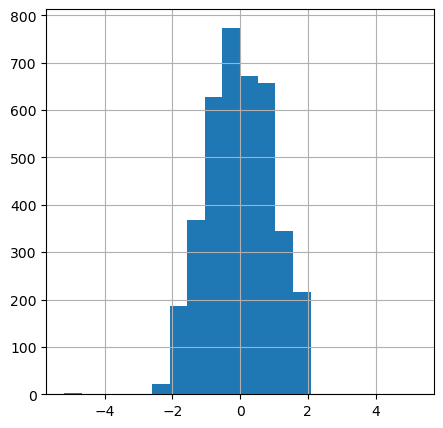

In [112]:
#Transformation volatile acidity
from sklearn.preprocessing import QuantileTransformer

# kopie von df2
df2_ch11 = df2.copy()

qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df2_ch11['volatile acidity'].array.reshape(-1, 1)))

df2_ch11['volatile acidity']=trans_x

df2_ch11['volatile acidity'].hist(bins=20,figsize=(5, 5))

<AxesSubplot:>

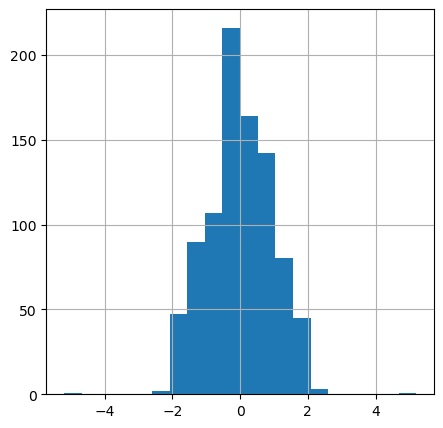

In [113]:
#Transformation volatile acidity für Testdaten
from sklearn.preprocessing import QuantileTransformer

# kopie von df1
df1_ch11 = df1.copy()

qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df1_ch11['volatile acidity'].array.reshape(-1, 1)))

df1_ch11['volatile acidity']=trans_x

df1_ch11['volatile acidity'].hist(bins=20,figsize=(5, 5))

In [114]:
# Lineares Regressionsmodell für df2_ch11
# --- Lineares Regressionsmodell verbessert für minerals---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch11.iloc[:,:-1]
train_labels=df2_ch11.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch11.iloc[:,:-1]
test_labels=df1_ch11.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 6.32468916e-06  1.22888647e-01 -1.98700975e-01 -3.67138656e-02
  9.96117336e-02 -5.77245992e-04  3.61237701e-05 -4.29638982e-04
  1.47607307e-04 -1.59968832e-01  4.65028896e-03  6.36111228e-04
 -2.09805635e+02  9.20034635e-01  6.42512041e-01  1.24579788e-01
  8.64799751e-01  8.82473871e-01 -3.46741730e+00  8.88724775e-01
  8.31418907e-01]
MAE: 1.921
R^2 value of the model:  -0.004257965935921648
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     276.4
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:03   Log-Likelihood:                -4269.0
No. Observations:                3869   AIC:                             8578.
Df Residuals:       

In [115]:
# hinzufügen der Resultate ins log file
data = [11, 1.921 ,0.577,'volatile acidity Transformiert', 'chlorides', 0.783, 'citric acid', 0.729]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517
6,6,1.926,0.576,flavanoids Ausreißer angepasst,chlorides,0.956,Unnamed :,0.536
7,7,1.924,0.576,residual sugar Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.538
8,8,1.926,0.576,total sulfur dioxide Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.558
9,9,1.926,0.577,pH Ausreißer angepasst,chlorides,0.979,Unnamed 0:,0.571


In [116]:
#Magnesium sieht homogenisiert aus -> muss dementsprechend transformiert werden. 
#Dazu erfolgt erst eine Rank Transformation und anschließend eine Quantile Transformation
from scipy.stats import rankdata

# Rank Transformation
df2['magnesium'] = rankdata(df2['magnesium'])

#Rank Transformation für Testdaten
df1['magnesium'] = rankdata(df1['magnesium'])

print(df2['magnesium'])

0       2994.0
1        210.0
2       3301.0
3        483.0
4        241.0
         ...  
3995    3594.0
3996    3678.0
3997    1976.0
3998    3284.0
3999    1136.0
Name: magnesium, Length: 3869, dtype: float64


<AxesSubplot:>

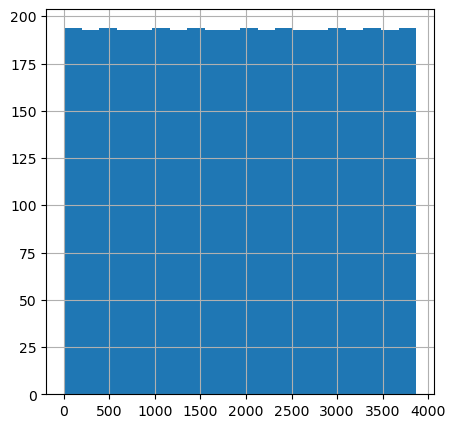

In [117]:
df2['magnesium'].hist(bins=20,figsize=(5, 5))

<AxesSubplot:>

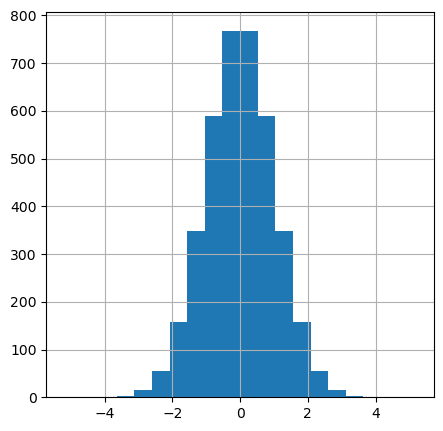

In [118]:
from sklearn.preprocessing import QuantileTransformer

# kopie von df2
df2_ch12 = df2.copy()

qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df2_ch12['magnesium'].array.reshape(-1, 1)))

df2_ch12['magnesium']=trans_x

df2_ch12['magnesium'].hist(bins=20,figsize=(5, 5))

<AxesSubplot:>

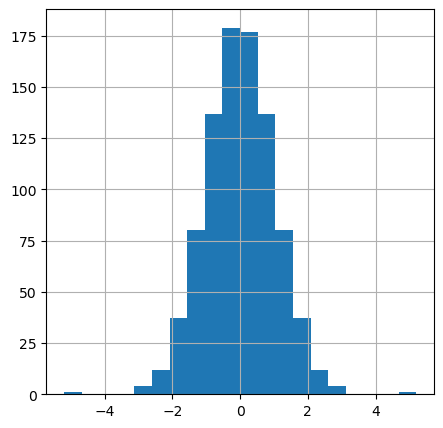

In [119]:


# kopie von df2
df1_ch12 = df1.copy()

qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df1_ch12['magnesium'].array.reshape(-1, 1)))

df1_ch12['magnesium']=trans_x

df1_ch12['magnesium'].hist(bins=20,figsize=(5, 5))

In [120]:
# Lineares Regressionsmodell für df2_ch12
# --- Lineares Regressionsmodell verbessert für minerals---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch12.iloc[:,:-1]
train_labels=df2_ch12.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch12.iloc[:,:-1]
test_labels=df1_ch12.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 6.41550648e-06  1.26700535e-01 -1.91345498e+00 -8.28306810e-02
  9.84635716e-02 -4.05073908e-02  4.14936258e-05  3.54445086e-04
 -6.53731006e-04 -3.47078202e-02  4.75223613e-03  3.94592075e-04
 -2.07818799e+02  9.47955731e-01  6.62460928e-01  1.22478686e-01
  8.64585750e-01  8.84745362e-01 -3.47143522e+00  8.88613373e-01
  8.33490734e-01]
MAE: 1.926
R^2 value of the model:  -0.005366623349930988
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     261.9
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:04   Log-Likelihood:                -4271.4
No. Observations:                3869   AIC:                             8585.
Df Residuals:       

In [121]:
# hinzufügen der Resultate ins log file
data = [12, 1.926 ,0.576,'magnesium Transformiert', 'chlorides', 0.952, 'minerals', 0.844]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517
6,6,1.926,0.576,flavanoids Ausreißer angepasst,chlorides,0.956,Unnamed :,0.536
7,7,1.924,0.576,residual sugar Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.538
8,8,1.926,0.576,total sulfur dioxide Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.558
9,9,1.926,0.577,pH Ausreißer angepasst,chlorides,0.979,Unnamed 0:,0.571


<AxesSubplot:>

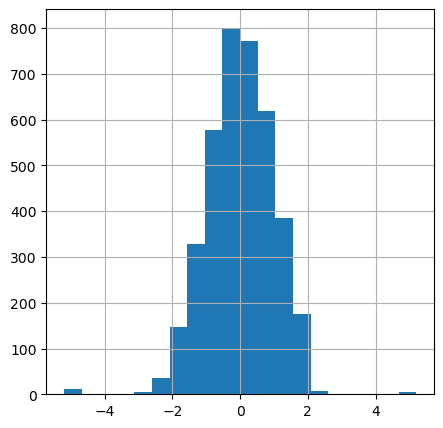

In [122]:
#Transformation citric acid
from sklearn.preprocessing import QuantileTransformer

# kopie von df2
df2_ch13 = df2.copy() 
qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df2_ch13['citric acid'].array.reshape(-1, 1)))

df2_ch13['citric acid']=trans_x

df2_ch13['citric acid'].hist(bins=20,figsize=(5, 5))

<AxesSubplot:>

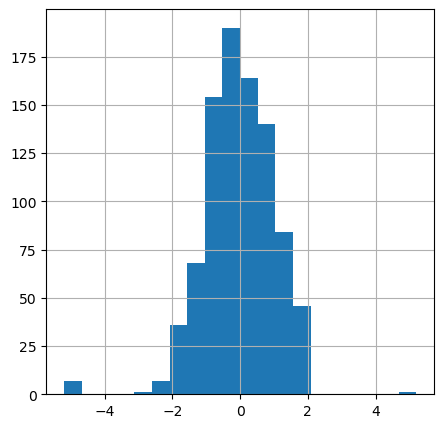

In [123]:
#Transformation citric acid für Testdaten
from sklearn.preprocessing import QuantileTransformer

# kopie von df1
df1_ch13 = df1.copy()

qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df1_ch13['citric acid'].array.reshape(-1, 1)))

df1_ch13['citric acid']=trans_x

df1_ch13['citric acid'].hist(bins=20,figsize=(5, 5))

In [124]:
# Lineares Regressionsmodell für df2_ch9
# --- Lineares Regressionsmodell verbessert für minerals---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch13.iloc[:,:-1]
train_labels=df2_ch13.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch13.iloc[:,:-1]
test_labels=df1_ch13.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 5.84988905e-06  1.23555149e-01 -1.88379825e+00  2.13917846e-03
  9.85637289e-02  1.12489311e-03  4.31299682e-05 -4.43151372e-02
  4.40240253e-02 -9.59195593e-02  4.75331166e-03  3.84990397e-04
 -2.09012408e+02  9.56431744e-01  6.54194034e-01  1.20280594e-01
  8.64363053e-01  8.84615194e-01 -3.47241807e+00  8.89294396e-01
  8.34145424e-01]
MAE: 3.108
R^2 value of the model:  -0.06986276353557086
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     262.1
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:04   Log-Likelihood:                -4270.7
No. Observations:                3869   AIC:                             8583.
Df Residuals:        

In [125]:
# hinzufügen der Resultate ins log file
data = [13, 3.108 ,0.577,'citric acid Transformiert', 'chlorides', 0.869, 'Unnamed 0:', 0.567 ]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517
6,6,1.926,0.576,flavanoids Ausreißer angepasst,chlorides,0.956,Unnamed :,0.536
7,7,1.924,0.576,residual sugar Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.538
8,8,1.926,0.576,total sulfur dioxide Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.558
9,9,1.926,0.577,pH Ausreißer angepasst,chlorides,0.979,Unnamed 0:,0.571


<AxesSubplot:>

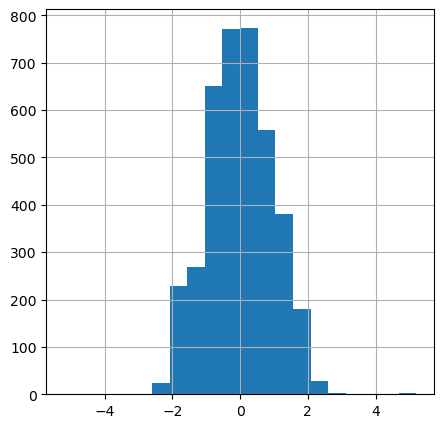

In [126]:
#Transformation residual sugar
from sklearn.preprocessing import QuantileTransformer
# kopie von df2
df2_ch14 = df2.copy()
qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df2_ch14['residual sugar'].array.reshape(-1, 1)))

df2_ch14['residual sugar']=trans_x

df2_ch14['residual sugar'].hist(bins=20,figsize=(5, 5))

<AxesSubplot:>

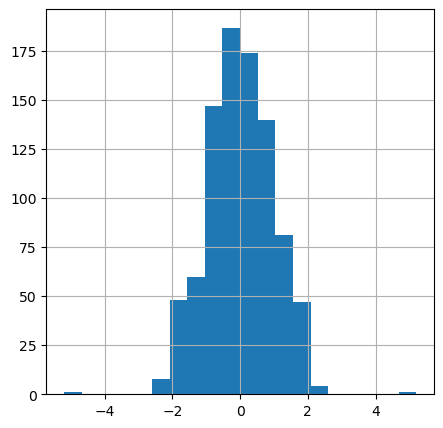

In [127]:
#Transformation residual sugar für Testdaten
from sklearn.preprocessing import QuantileTransformer
# kopie von df1
df1_ch14 = df1.copy()
qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df1_ch14['residual sugar'].array.reshape(-1, 1)))

df1_ch14['residual sugar']=trans_x

df1_ch14['residual sugar'].hist(bins=20,figsize=(5, 5))

In [128]:
# Lineares Regressionsmodell für df2_ch14
# --- Lineares Regressionsmodell verbessert für minerals---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch14.iloc[:,:-1]
train_labels=df2_ch14.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch14.iloc[:,:-1]
test_labels=df1_ch14.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 5.54937958e-06  5.24637771e-02 -1.94237441e+00 -2.22951364e-02
  3.25534871e-01  9.57545922e-04  2.81144554e-05 -3.78533777e-02
  3.75226358e-02 -7.02468968e-01  5.66223972e-03 -3.31624953e-04
 -1.15576020e+02  5.93509084e-01  4.87612262e-01  2.01560091e-01
  8.66009642e-01  8.90487091e-01 -3.49059482e+00  9.00452816e-01
  8.33645272e-01]
MAE: 2.876
R^2 value of the model:  -0.056587176840355635
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     261.8
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:04   Log-Likelihood:                -4271.8
No. Observations:                3869   AIC:                             8586.
Df Residuals:       

In [129]:
# hinzufügen der Resultate ins log file
data = [14, 2.876 ,0.576,'residual sugar Transformiert', 'citric acid', 0.835, 'flavanoids', 0.518]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517
6,6,1.926,0.576,flavanoids Ausreißer angepasst,chlorides,0.956,Unnamed :,0.536
7,7,1.924,0.576,residual sugar Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.538
8,8,1.926,0.576,total sulfur dioxide Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.558
9,9,1.926,0.577,pH Ausreißer angepasst,chlorides,0.979,Unnamed 0:,0.571


<AxesSubplot:>

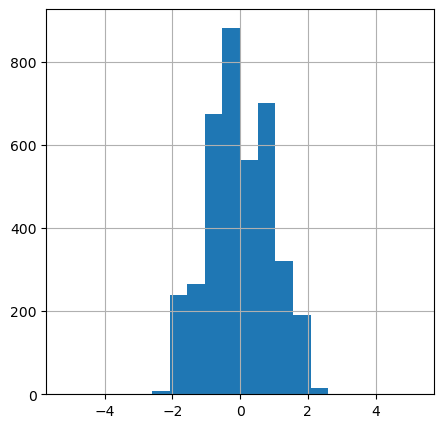

In [130]:
#Transformation sulphates
from sklearn.preprocessing import QuantileTransformer

# kopie von df2
df2_ch15 = df2.copy()

qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df2_ch15['sulphates'].array.reshape(-1, 1)))

df2_ch15['sulphates']=trans_x

df2_ch15['sulphates'].hist(bins=20,figsize=(5, 5))

<AxesSubplot:>

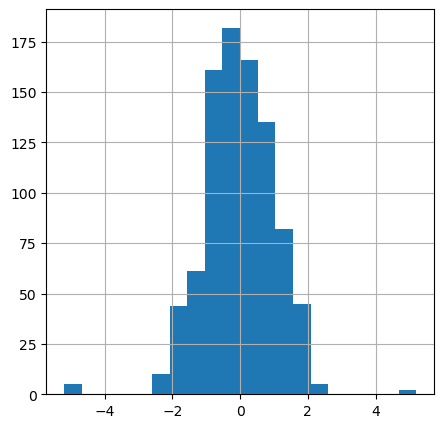

In [131]:
#Transformation sulphates für Testdaten
from sklearn.preprocessing import QuantileTransformer

# kopie von df1
df1_ch15 = df1.copy()

qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df1_ch15['sulphates'].array.reshape(-1, 1)))

df1_ch15['sulphates']=trans_x

df1_ch15['sulphates'].hist(bins=20,figsize=(5, 5))

<AxesSubplot:>

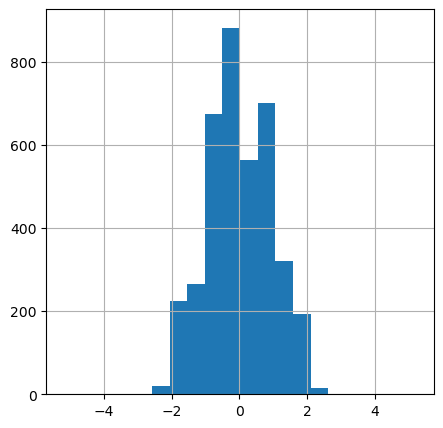

In [132]:
# Power Transformation für sulphates
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=False)
trans_x= pt.fit_transform(np.array(df2_ch15['sulphates'].array.reshape(-1, 1)))

df2_ch15['sulphates']=trans_x

df2_ch15['sulphates'].hist(bins=20,figsize=(5, 5))

<AxesSubplot:>

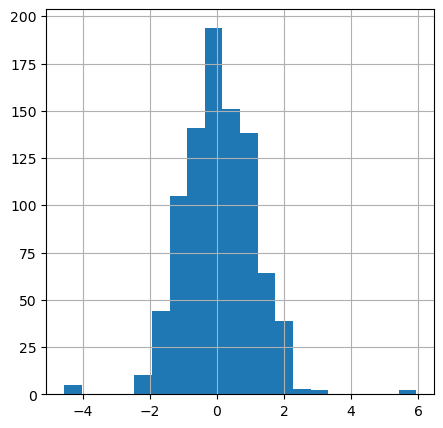

In [133]:
# Power Transformation für sulphates Testdaten
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=False)
trans_x= pt.fit_transform(np.array(df1_ch15['sulphates'].array.reshape(-1, 1)))

df1_ch15['sulphates']=trans_x

df1_ch15['sulphates'].hist(bins=20,figsize=(5, 5))

In [134]:
# Lineares Regressionsmodell für df2_ch15
# --- Lineares Regressionsmodell verbessert für minerals---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch15.iloc[:,:-1]
train_labels=df2_ch15.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch15.iloc[:,:-1]
test_labels=df1_ch15.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 6.02150516e-06  1.24490231e-01 -1.90828808e+00 -7.60953242e-02
  9.70870262e-02  1.10972195e-03  4.38714221e-05 -4.37276224e-02
  4.34364380e-02 -7.91024126e-02  4.92500194e-03  3.33146521e-04
 -2.04061723e+02  9.39309779e-01  7.51634906e-02  1.28725252e-01
  8.65016142e-01  8.85318468e-01 -3.47374681e+00  8.88693139e-01
  8.34719065e-01]
MAE: 3.083
R^2 value of the model:  -0.06831880739308893
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     261.7
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:05   Log-Likelihood:                -4272.1
No. Observations:                3869   AIC:                             8586.
Df Residuals:        

In [135]:
# hinzufügen der Resultate ins log file
data = [15, 3.083 ,0.578,'sulphates Transformiert', 'chlorides', 0.892, 'citric acid', 0.476]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517
6,6,1.926,0.576,flavanoids Ausreißer angepasst,chlorides,0.956,Unnamed :,0.536
7,7,1.924,0.576,residual sugar Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.538
8,8,1.926,0.576,total sulfur dioxide Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.558
9,9,1.926,0.577,pH Ausreißer angepasst,chlorides,0.979,Unnamed 0:,0.571


<AxesSubplot:>

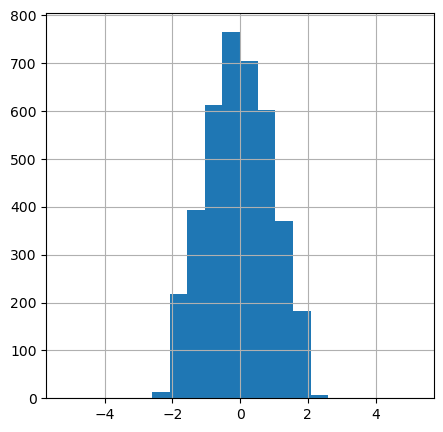

In [136]:
#Transformation chlorides
from sklearn.preprocessing import QuantileTransformer
# kopie von df2
df2_ch16 = df2.copy()
qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df2_ch16['chlorides'].array.reshape(-1, 1)))

df2_ch16['chlorides']=trans_x

df2_ch16['chlorides'].hist(bins=20,figsize=(5, 5))

<AxesSubplot:>

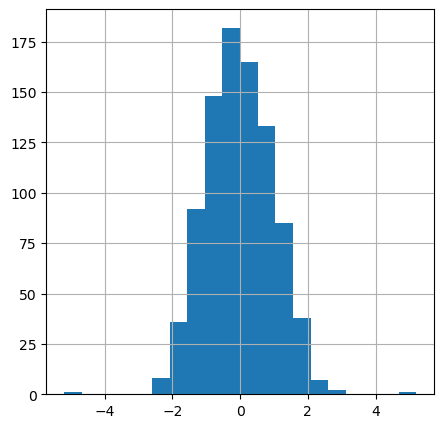

In [137]:
#Transformation chlorides für Testdaten
from sklearn.preprocessing import QuantileTransformer
# kopie von df1
df1_ch16 = df1.copy()
qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df1_ch16['chlorides'].array.reshape(-1, 1)))

df1_ch16['chlorides']=trans_x

df1_ch16['chlorides'].hist(bins=20,figsize=(5, 5))

In [138]:
# Lineares Regressionsmodell für df2_ch12
# --- Lineares Regressionsmodell verbessert für minerals---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2_ch16.iloc[:,:-1]
train_labels=df2_ch16.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1_ch16.iloc[:,:-1]
test_labels=df1_ch16.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 5.87812465e-06  1.20500094e-01 -1.90020025e+00 -7.93568988e-02
  9.49756153e-02  1.12759508e-03  4.11011812e-05 -4.43961148e-02
  4.41015892e-02 -2.23041377e-02  4.77027721e-03  4.40352458e-04
 -1.99072648e+02  9.21557286e-01  6.53421565e-01  1.24019659e-01
  8.64027718e-01  8.84904938e-01 -3.47252598e+00  8.89372645e-01
  8.34220676e-01]
MAE: 3.112
R^2 value of the model:  -0.0701092228117699
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     262.4
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:05   Log-Likelihood:                -4269.4
No. Observations:                3869   AIC:                             8581.
Df Residuals:         

In [139]:
# hinzufügen der Resultate ins log file
data = [16, 3.112 ,0.577,'chlorides Transformiert', 'Unnamed 0', 0.565, 'citric acid', 0.455]
log.loc[len(log)] = data
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517
6,6,1.926,0.576,flavanoids Ausreißer angepasst,chlorides,0.956,Unnamed :,0.536
7,7,1.924,0.576,residual sugar Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.538
8,8,1.926,0.576,total sulfur dioxide Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.558
9,9,1.926,0.577,pH Ausreißer angepasst,chlorides,0.979,Unnamed 0:,0.571


In [140]:
# --- finales log-file
log

,ID,MAE,R^2,Anpassung,f1 hoher p-Wert,p-Wert1,f2 hoher p-Wert,p-Wert2
0,0,2.107,0.016,keine Änderung,chlorides,0.934,total sulfur dioxide,0.362
1,1,2.108,0.016,Calcium gelöscht,volotile acidity,0.903,flavanids,0.588
2,2,2.097,0.016,Löschen von Free sulfur dioxide,total sulfur dioxide,0.935,volotile acidity,0.866
3,3,2.107,0.016,Density gelöscht,pH,0.999,volotile acidity,0.985
4,4,1.926,0.576,Minerals Ausreißer angepasst,chlorides,0.955,calcium,0.600
5,5,1.924,0.577,fixed acidity Ausreißer angepasst,chlorides,0.948,Unnamed 0:,0.517
6,6,1.926,0.576,flavanoids Ausreißer angepasst,chlorides,0.956,Unnamed :,0.536
7,7,1.924,0.576,residual sugar Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.538
8,8,1.926,0.576,total sulfur dioxide Ausreißer angepasst,chlorides,0.956,Unnamed 0:,0.558
9,9,1.926,0.577,pH Ausreißer angepasst,chlorides,0.979,Unnamed 0:,0.571


In [141]:
# -----------Weitere sinnvolle Anpassungen an die Daten    ---------

In [142]:
# - Löschen von Unnamed = 0, da das nur erneut die ID ist und oft hohen p-Wert haben.
df2 = df2.drop('Unnamed: 0', axis=1)
# features in df1 löschen
df1 = df1.drop('Unnamed: 0', axis=1)

In [143]:
# - Löschen der Zeilen in den Testdaten, bei denen die Qualität = 99
# - Erkenntnis aus MS3, der hier ausgeführt wird, und das Ergebnis stark verfälscht.
df1 = df1[df1['quality']!= 99]

In [144]:
# Kombination sinnvoller Anpassungen für das finale Modell und dessen Werte.

In [145]:
# - Löschen von free sulfur dioxide
df2= df2.drop('free sulfur dioxide', axis=1)

# Bei folgenden Spalten wir Outlierhandling durchgeführt:
cloumns = ['minerals', 'fixed acidity', 'flavaniods', 'residual sugar', 'total sulfur dioxide', 'pH', 'quality']

# For-Schleife, um die Ausreißer herauszufinden und zu ersetzen:
for col in columns:
    
    # Median berenchnen
    col_median = df2[col].median()
    
    # Standardabweichung berechnen
    col_std = df2[col].std()
    
    # Außreißer identifizieren
    outliers = df2[(df2[col] > col_median + 3 * col_std) | (df2[col] < col_median - 3 * col_std)]
    
    # Median in die Ausreißer einsetzen
    df2.loc[outliers.index, col] = col_median
    
# - volatile acidity transformieren

#Transformation volatile acidity
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df2['volatile acidity'].array.reshape(-1, 1)))

df2['volatile acidity']=trans_x

qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_y=qt.fit_transform(np.array(df1['volatile acidity'].array.reshape(-1, 1)))

df1['volatile acidity']=trans_y


# Transformation von Magnesium

# Rank Transformation
df2['magnesium'] = rankdata(df2['magnesium'])

#Rank Transformation für Testdaten
df1['magnesium'] = rankdata(df1['magnesium'])

# Quantile Transformer für Magnesium
qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_x=qt.fit_transform(np.array(df2['magnesium'].array.reshape(-1, 1)))

df2['magnesium']=trans_x

# Quantile Transformer für Magnesium Testdaten
qt = QuantileTransformer(n_quantiles=25, output_distribution='normal',random_state=0)
trans_y=qt.fit_transform(np.array(df1['magnesium'].array.reshape(-1, 1)))

df1['magnesium']=trans_y

In [146]:
# -- Datensatz für das finale Modell --- 
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,Cabernet Sauvignon,Chardonnay,Gamay,Merlot,Pinot noir,quality
0,5.8,-1.731664,0.49,1.1,0.751370,894.94,186.639301,109.91,0.048,98.0,0.99290,3.19,0.48,9.2,0,0,0,0,1,5
1,6.6,-0.157311,0.32,5.6,-1.606946,1160.95,251.875712,247.08,0.039,68.0,0.99163,2.96,0.52,11.1,0,0,0,1,0,6
2,6.7,-0.674490,0.34,1.5,1.050057,789.82,304.703710,219.51,0.035,123.0,0.98949,3.24,0.36,12.6,0,1,0,0,0,7
3,8.3,0.210428,0.27,17.5,-1.152235,777.86,237.586525,225.61,0.045,253.0,1.00014,3.02,0.56,9.1,0,0,0,1,0,6
4,7.5,1.429788,0.19,6.9,-1.537810,785.72,95.399673,89.80,0.041,150.0,0.99508,3.23,0.37,10.0,0,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,6.4,-0.430727,0.37,7.9,1.467676,1143.32,318.791914,226.09,0.050,150.0,0.99488,2.86,0.49,9.3,1,0,0,0,0,6
3996,7.0,-0.548522,0.26,9.2,1.650900,863.32,322.107955,227.30,0.027,122.0,0.99228,3.06,0.34,12.5,1,0,0,0,0,8
3997,7.5,0.000000,0.30,4.6,0.026573,831.67,360.872474,310.76,0.027,92.0,0.99085,3.15,0.38,12.0,0,0,0,1,0,7
3998,6.3,1.479941,0.32,8.8,1.031126,1300.32,328.915688,244.11,0.042,106.0,0.99172,3.28,0.33,12.9,0,1,0,0,0,7


In [147]:
# free sulfur dioxide in Testdaten löschen
# - Löschen von free sulfur dioxide
df1 = df1.drop('free sulfur dioxide', axis=1)

In [148]:
# --- Finales Regressionsmodell ---
# Lineares Regressionsmodell für df2_ch12
# --- Lineares Regressionsmodell verbessert für minerals---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2.iloc[:,:-1]
train_labels=df2.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1.iloc[:,:-1]
test_labels=df1.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 1.26659886e-01 -2.11622652e-01 -1.02422849e-02  1.08974209e-01
 -2.98710745e-02  3.48792841e-05  1.49844846e-05 -3.08796124e-04
 -6.14076038e-02  1.84114935e-03 -2.31507418e+02  9.65151126e-01
  6.53762970e-01  1.04558696e-01  8.63589352e-01  8.80474647e-01
 -3.46427746e+00  8.90319103e-01  8.29894361e-01]
MAE: 0.583
R^2 value of the model:  0.5838850195978695
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     288.7
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:05   Log-Likelihood:                -4280.7
No. Observations:                3869   AIC:                             8599.
Df Residuals:                    3850   BIC:            

In [149]:
# löschen von calcium, da oft hohe p-Werte (vgl. log)
df2 = df2.drop('calcium', axis=1)
df1 = df1.drop('calcium', axis=1)

In [150]:
# --- Finales Regressionsmodell ---
# Lineares Regressionsmodell für df2_ch12
# --- Lineares Regressionsmodell verbessert für minerals---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2.iloc[:,:-1]
train_labels=df2.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1.iloc[:,:-1]
test_labels=df1.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 1.26641587e-01 -2.11584002e-01 -1.00274181e-02  1.08943703e-01
 -2.12605418e-02  3.47796742e-05 -2.90896353e-04 -6.15336115e-02
  1.84235424e-03 -2.31469957e+02  9.65022241e-01  6.53626036e-01
  1.04601256e-01  8.63527637e-01  8.80510342e-01 -3.46427937e+00
  8.90377368e-01  8.29864022e-01]
MAE: 0.583
R^2 value of the model:  0.5838677136410142
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     305.8
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:05   Log-Likelihood:                -4280.7
No. Observations:                3869   AIC:                             8597.
Df Residuals:                    3851   BIC:                            

In [151]:
# löschen von chlorides, da oft hohe p-Werte (vgl. log)
df2 = df2.drop('chlorides', axis=1)
df1 = df1.drop('chlorides', axis=1)

In [152]:
# --- Finales Regressionsmodell ---
# Lineares Regressionsmodell für df2_ch12
# --- Lineares Regressionsmodell verbessert für minerals---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2.iloc[:,:-1]
train_labels=df2.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1.iloc[:,:-1]
test_labels=df1.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 1.27151694e-01 -2.11729004e-01 -1.11174721e-02  1.09168935e-01
 -2.12210764e-02  3.48183582e-05 -2.91114817e-04  1.84172561e-03
 -2.31990943e+02  9.67566780e-01  6.54198520e-01  1.04426359e-01
  8.63510887e-01  8.80510789e-01 -3.46419143e+00  8.90358489e-01
  8.29811268e-01]
MAE: 0.584
R^2 value of the model:  0.5838576310655916
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     325.0
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:05   Log-Likelihood:                -4280.7
No. Observations:                3869   AIC:                             8595.
Df Residuals:                    3852   BIC:                             8702.
Df Model:

In [153]:
# --- Finales Regressionsmodell ---
# Lineares Regressionsmodell für df2_ch12
# --- Lineares Regressionsmodell verbessert für minerals---
# Definiere train_features und train_labels+
# Splitten von training data into features and labels

# Training Data
train_features=df2.iloc[:,:-1]
train_labels=df2.iloc[:, -1]

# Split test data into features and labels
# Testdata
test_features=df1.iloc[:,:-1]
test_labels=df1.iloc[:, -1]

# Linear Regression 
from sklearn import linear_model
reg = linear_model.LinearRegression()

#Fit regression model to training data
reg.fit(train_features, train_labels)

#Print regression coefficients
print('Regression coefficients: ',reg.coef_)

ypred = reg.predict(test_features)

#Return Mean Absolute Error
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction.
print("R^2 value of the model: ",reg.score(test_features,test_labels))

X = train_features
y = train_labels

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

Regression coefficients:  [ 1.27151694e-01 -2.11729004e-01 -1.11174721e-02  1.09168935e-01
 -2.12210764e-02  3.48183582e-05 -2.91114817e-04  1.84172561e-03
 -2.31990943e+02  9.67566780e-01  6.54198520e-01  1.04426359e-01
  8.63510887e-01  8.80510789e-01 -3.46419143e+00  8.90358489e-01
  8.29811268e-01]
MAE: 0.584
R^2 value of the model:  0.5838576310655916
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     325.0
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:08:05   Log-Likelihood:                -4280.7
No. Observations:                3869   AIC:                             8595.
Df Residuals:                    3852   BIC:                             8702.
Df Model:

In [154]:
# Keine Verbesserung des Modells bei löschung von flavanoids oder citric acid

In [155]:
# ---- MS3 ------

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Lineare Regression initialisieren und trainieren
regression = LinearRegression()
regression.fit(train_features, train_labels)

# Vorhersagen für Trainings- und Testdaten erhalten
test_predictions = regression.predict(test_features)

# Berechnung der Metriken für Testdaten
test_mae = mean_absolute_error(test_labels, test_predictions)
test_r2 = r2_score(test_labels, test_predictions)
test_rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))

# Ausgabe der Metriken
print("Test MAE:", test_mae)
print("Test R-Squared:", test_r2)
print("Test RMSE:", test_rmse)


Test MAE: 0.5835045469861517
Test R-Squared: 0.5838576310655916
Test RMSE: 0.7560131281232783


In [157]:
# --- LOG-file mit den einzelnen Änderungen am Datensatz und der Auswirkung auf das Modell

log = pd.DataFrame(columns=['ID', 'MAE','R^2', 'RSME', 'Modell', 'Optimierung'])
# neue Spalte template
data = [0, 0.584, 0.584 ,0.756, 'Lineare Regression', 'keine']
# hinzufügen der Spalte
log.loc[len(log)] = data
log

,ID,MAE,R^2,RSME,Modell,Optimierung
0,0,0.584,0.584,0.756,Lineare Regression,keine


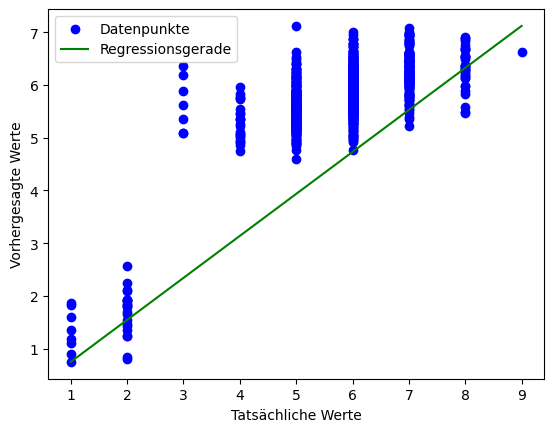

In [158]:
import matplotlib.pyplot as plt
import numpy as np

# Scatterplot mit Regressionsgerade
plt.scatter(test_labels, test_predictions, color='blue', label='Datenpunkte')
plt.plot([min(test_labels), max(test_labels)], [min(test_predictions), max(test_predictions)], color='green', label='Regressionsgerade')

# Achsenbeschriftungen
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')

# Legende
plt.legend()

# Plot anzeigen
plt.show()

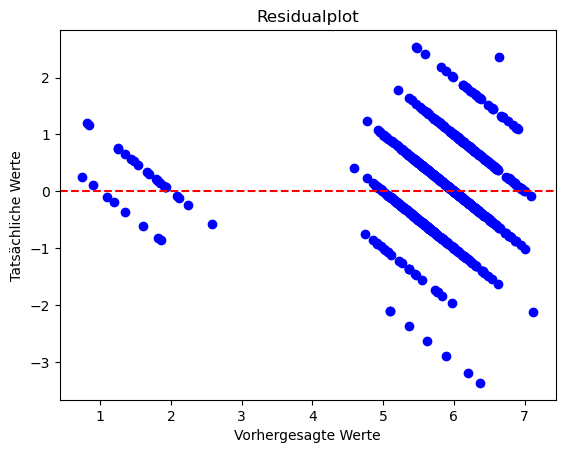

In [159]:
# Residuen berechnen
residuals = test_labels - ypred

# Residualplot
plt.scatter(ypred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Tatsächliche Werte')
plt.title('Residualplot')
plt.show()

In [160]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Initialize and fit polynomial regression
degree=2
poly_reg=make_pipeline(PolynomialFeatures(degree),linear_model.LinearRegression())
poly_reg.fit(train_features,train_labels)

#Predict all test examples
ypred = poly_reg.predict(test_features)

mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#RSME Wert ausgeben
test_rmse = np.sqrt(mean_squared_error(test_labels, ypred))
print("Test RMSE:", test_rmse)

r2 = poly_reg.score(test_features, test_labels)
print('R^2: %.3f' % r2)


MAE: 0.564
Test RMSE: 0.737818381737028
R^2: 0.604


In [161]:
# --- LOG-file mit den einzelnen Änderungen am Datensatz und der Auswirkung auf das Modell


# neue Spalte template 
data = [1, 0.564, 0.604 ,0.738, 'Polynomiale Regression', 'keine']
# hinzufügen der Spalte
log.loc[len(log)] = data
log

,ID,MAE,R^2,RSME,Modell,Optimierung
0,0,0.584,0.584,0.756,Lineare Regression,keine
1,1,0.564,0.604,0.738,Polynomiale Regression,keine


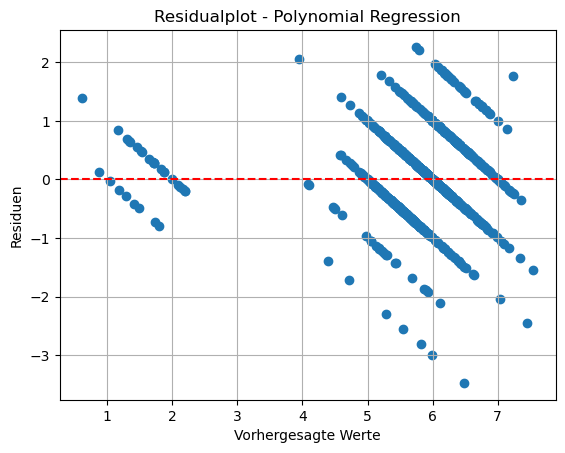

In [162]:
# Scatterplot Polynomiale Regression 
import numpy as np
import matplotlib.pyplot as plt

# Berechnen der Residuen
residuals = test_labels - ypred

# Residualplot erstellen
plt.scatter(ypred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Residuen')
plt.title('Residualplot - Polynomial Regression')
plt.grid(True)
plt.show()

In [163]:
#KNN Regression Model
from sklearn.neighbors import KNeighborsRegressor

#Initialize and fit KNN regression
KNN_reg = KNeighborsRegressor(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=20)
KNN_reg.fit(train_features,train_labels)

#Predict all test examples
ypred = KNN_reg.predict(test_features)

mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

r2 = KNN_reg.score(test_features, test_labels)
print('R^2: %.3f' % r2)

#RSME Wert ausgeben
test_rmse = np.sqrt(mean_squared_error(test_labels, ypred))
print("Test RMSE:", test_rmse)

MAE: 0.971
R^2: -0.281
Test RMSE: 1.3266380078513462


In [164]:
# --- LOG-file mit den einzelnen Änderungen am Datensatz und der Auswirkung auf das Modell


# neue Spalte template 
data = [3, 0.971, -0.281 ,1.327, 'KNeighborsRegressor', 'Neighbors=3, leaf_size=20']
# hinzufügen der Spalte
log.loc[len(log)] = data
log

,ID,MAE,R^2,RSME,Modell,Optimierung
0,0,0.584,0.584,0.756,Lineare Regression,keine
1,1,0.564,0.604,0.738,Polynomiale Regression,keine
2,3,0.971,-0.281,1.327,KNeighborsRegressor,"Neighbors=3, leaf_size=20"


In [165]:
#KNN Regression Model 2
from sklearn.neighbors import KNeighborsRegressor

#Initialize and fit KNN regression
KNN_reg = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=10)
KNN_reg.fit(train_features,train_labels)

#Predict all test examples
ypred = KNN_reg.predict(test_features)

mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

r2 = KNN_reg.score(test_features, test_labels)
print('R^2: %.3f' % r2)

#RSME Wert ausgeben
test_rmse = np.sqrt(mean_squared_error(test_labels, ypred))
print("Test RMSE:", test_rmse)

MAE: 0.906
R^2: -0.126
Test RMSE: 1.243450638958147


In [166]:
# --- LOG-file mit den einzelnen Änderungen am Datensatz und der Auswirkung auf das Modell


# neue Spalte template 
data = [4, 0.906, -0.126 ,1.243, 'KNeighborsRegressor', 'Neighbors=5, leaf_size=10']
# hinzufügen der Spalte
log.loc[len(log)] = data
log

,ID,MAE,R^2,RSME,Modell,Optimierung
0,0,0.584,0.584,0.756,Lineare Regression,keine
1,1,0.564,0.604,0.738,Polynomiale Regression,keine
2,3,0.971,-0.281,1.327,KNeighborsRegressor,"Neighbors=3, leaf_size=20"
3,4,0.906,-0.126,1.243,KNeighborsRegressor,"Neighbors=5, leaf_size=10"


In [167]:
#KNN Regression Model 3
from sklearn.neighbors import KNeighborsRegressor

#Initialize and fit KNN regression
KNN_reg = KNeighborsRegressor(n_neighbors=10, weights='uniform', algorithm='auto', leaf_size=10)
KNN_reg.fit(train_features,train_labels)

#Predict all test examples
ypred = KNN_reg.predict(test_features)

mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

r2 = KNN_reg.score(test_features, test_labels)
print('R^2: %.3f' % r2)

#RSME Wert ausgeben
test_rmse = np.sqrt(mean_squared_error(test_labels, ypred))
print("Test RMSE:", test_rmse)

MAE: 0.872
R^2: -0.062
Test RMSE: 1.2079772512543532


In [168]:
# --- LOG-file mit den einzelnen Änderungen am Datensatz und der Auswirkung auf das Modell


# neue Spalte template 
data = [5, 0.872, -0.062 ,1.21, 'KNeighborsRegressor', 'Neighbors=10, leaf_size=10']
# hinzufügen der Spalte
log.loc[len(log)] = data
log

,ID,MAE,R^2,RSME,Modell,Optimierung
0,0,0.584,0.584,0.756,Lineare Regression,keine
1,1,0.564,0.604,0.738,Polynomiale Regression,keine
2,3,0.971,-0.281,1.327,KNeighborsRegressor,"Neighbors=3, leaf_size=20"
3,4,0.906,-0.126,1.243,KNeighborsRegressor,"Neighbors=5, leaf_size=10"
4,5,0.872,-0.062,1.210,KNeighborsRegressor,"Neighbors=10, leaf_size=10"


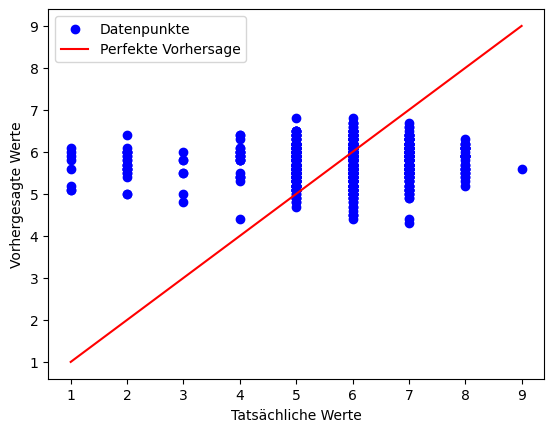

In [169]:
import matplotlib.pyplot as plt

# Scatterplot der Vorhersagen erstellen
plt.scatter(test_labels, ypred, color='blue', label='Datenpunkte')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', label='Perfekte Vorhersage')

# Achsenbeschriftungen
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')

# Legende
plt.legend()

# Plot anzeigen
plt.show()


In [170]:
#Regression tree
from sklearn.tree import DecisionTreeRegressor

#Initialize and fit regression tree
tree_reg_1 = DecisionTreeRegressor(random_state=0,max_depth=None, min_samples_split=2, max_features=None, criterion="mse")
tree_reg_1.fit(train_features,train_labels)

#Predict all test examples
ypred = tree_reg_1.predict(test_features)

mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

r2 = tree_reg_1.score(test_features, test_labels)
print('R^2: %.3f' % r2)

#RSME Wert ausgeben
test_rmse = np.sqrt(mean_squared_error(test_labels, ypred))
print("Test RMSE:", test_rmse)

MAE: 0.653
R^2: 0.241
Test RMSE: 1.0206899184397384


/Users/oresttkach/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [171]:
# neue Spalte template 
data = [6, 0.653, 0.241 , 1.021, 'DecisionTreeRegressor', 'Default-Werte']
# hinzufügen der Spalte
log.loc[len(log)] = data
log

,ID,MAE,R^2,RSME,Modell,Optimierung
0,0,0.584,0.584,0.756,Lineare Regression,keine
1,1,0.564,0.604,0.738,Polynomiale Regression,keine
2,3,0.971,-0.281,1.327,KNeighborsRegressor,"Neighbors=3, leaf_size=20"
3,4,0.906,-0.126,1.243,KNeighborsRegressor,"Neighbors=5, leaf_size=10"
4,5,0.872,-0.062,1.210,KNeighborsRegressor,"Neighbors=10, leaf_size=10"
5,6,0.653,0.241,1.021,DecisionTreeRegressor,Default-Werte


In [172]:
#Regression tree
from sklearn.tree import DecisionTreeRegressor

#Initialize and fit regression tree
tree_reg = DecisionTreeRegressor(random_state=1,max_depth=5, min_samples_split=3, max_features=4, criterion="friedman_mse")
tree_reg.fit(train_features,train_labels)

#Predict all test examples
ypred = tree_reg.predict(test_features)

mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

r2 = tree_reg.score(test_features, test_labels)
print('R^2: %.3f' % r2)

#RSME Wert ausgeben
test_rmse = np.sqrt(mean_squared_error(test_labels, ypred))
print("Test RMSE:", test_rmse)

MAE: 0.669
R^2: 0.356
Test RMSE: 0.9407136656255158


In [173]:
# neue Spalte template 
data = [7, 0.6669, 0.356 , 0.941, 'DecisionTreeRegressor', 'random_state=1, max_depth=5, min_samples_split=3']
# hinzufügen der Spalte
log.loc[len(log)] = data
log

,ID,MAE,R^2,RSME,Modell,Optimierung
0,0,0.5840,0.584,0.756,Lineare Regression,keine
1,1,0.5640,0.604,0.738,Polynomiale Regression,keine
2,3,0.9710,-0.281,1.327,KNeighborsRegressor,"Neighbors=3, leaf_size=20"
3,4,0.9060,-0.126,1.243,KNeighborsRegressor,"Neighbors=5, leaf_size=10"
4,5,0.8720,-0.062,1.210,KNeighborsRegressor,"Neighbors=10, leaf_size=10"
5,6,0.6530,0.241,1.021,DecisionTreeRegressor,Default-Werte
6,7,0.6669,0.356,0.941,DecisionTreeRegressor,"random_state=1, max_depth=5, min_samples_split=3"


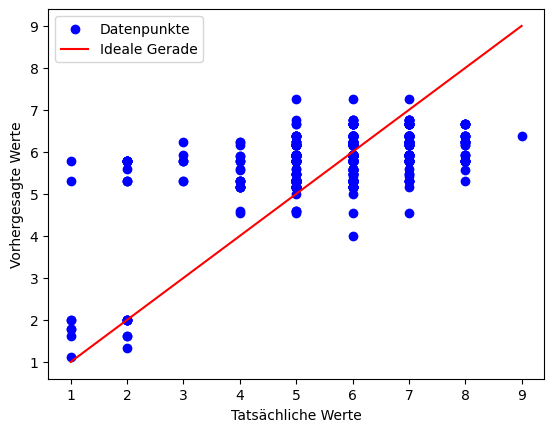

In [174]:
# Vorhersagen für den Decision Tree-Regressor
tree_reg_predictions = tree_reg.predict(test_features)

# Scatterplot der tatsächlichen Werte gegen die Vorhersagen
plt.scatter(test_labels, tree_reg_predictions, color='blue', label='Datenpunkte')

# Darstellung der idealen Geraden (perfekte Vorhersagen)
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', label='Ideale Gerade')

# Achsenbeschriftungen
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')

# Legende
plt.legend()

# Diagramm anzeigen
plt.show()

In [175]:
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

#gradient boosted tree
gbt = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1,random_state=None)
gbt.fit(train_features, train_labels)

#bagging tree modell
bagt= BaggingRegressor(tree.DecisionTreeRegressor(), n_estimators=10, max_samples=1.0, max_features=1.0 
                        ,random_state=0)
bagt.fit(train_features, train_labels)

# Vorhersagen für Gradient Boosted Tree
gbt_predictions = gbt.predict(test_features)
gbt_mae = mean_absolute_error(test_labels, gbt_predictions)
print('Gradient Boosted Tree:')
print("MAE (Gradient Boosted Tree):", gbt_mae)

gbt_r2 = gbt.score(test_features, test_labels)
print('R^2 (Gradient Boosted Tree): %.3f' % gbt_r2)

gbt_test_rmse = np.sqrt(mean_squared_error(test_labels, gbt_predictions))
print("Test RMSE (Gradient Boosted Tree):", gbt_test_rmse)

# Vorhersagen für Bagging Tree
bagt_predictions = bagt.predict(test_features)
bagt_mae = mean_absolute_error(test_labels, bagt_predictions)
print('Bagging Tree:')
print("MAE (Bagging Tree):", bagt_mae)

bagt_r2 = bagt.score(test_features, test_labels)
print('R^2 (Bagging Tree): %.3f' % bagt_r2)

bagt_test_rmse = np.sqrt(mean_squared_error(test_labels, bagt_predictions))
print("Test RMSE (Bagging Tree):", bagt_test_rmse)

Gradient Boosted Tree:
MAE (Gradient Boosted Tree): 0.5486220480195242
R^2 (Gradient Boosted Tree): 0.627
Test RMSE (Gradient Boosted Tree): 0.7160490894285851
Bagging Tree:
MAE (Bagging Tree): 0.5282485875706214
R^2 (Bagging Tree): 0.638
Test RMSE (Bagging Tree): 0.70508243698014


In [176]:
# neue Spalte template 
data = [8, 0.548, 0.627 , 0.716, 'Gradient Boosted Tree', 'Default']
# hinzufügen der Spalte
log.loc[len(log)] = data
log

# neue Spalte template 
data = [9, 0.528, 0.638 ,0.705, 'Bagging Tree', 'Default']
# hinzufügen der Spalte
log.loc[len(log)] = data
log

,ID,MAE,R^2,RSME,Modell,Optimierung
0,0,0.5840,0.584,0.756,Lineare Regression,keine
1,1,0.5640,0.604,0.738,Polynomiale Regression,keine
2,3,0.9710,-0.281,1.327,KNeighborsRegressor,"Neighbors=3, leaf_size=20"
3,4,0.9060,-0.126,1.243,KNeighborsRegressor,"Neighbors=5, leaf_size=10"
4,5,0.8720,-0.062,1.210,KNeighborsRegressor,"Neighbors=10, leaf_size=10"
5,6,0.6530,0.241,1.021,DecisionTreeRegressor,Default-Werte
6,7,0.6669,0.356,0.941,DecisionTreeRegressor,"random_state=1, max_depth=5, min_samples_split=3"
7,8,0.5480,0.627,0.716,Gradient Boosted Tree,Default
8,9,0.5280,0.638,0.705,Bagging Tree,Default


In [177]:
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

#gradient boosted tree
gbt2 = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.5,random_state=1)
gbt2.fit(train_features, train_labels)

#bagging tree modell
bagt2= BaggingRegressor(tree.DecisionTreeRegressor(), n_estimators=20, max_samples=0.8, max_features=1.0 
                        ,random_state=1)
bagt2.fit(train_features, train_labels)

# Vorhersagen für Gradient Boosted Tree
gbt2_predictions = gbt2.predict(test_features)
gbt2_mae = mean_absolute_error(test_labels, gbt2_predictions)
print('Gradient Boosted Tree:')
print("MAE (Gradient Boosted Tree):", gbt2_mae)

gbt2_r2 = gbt2.score(test_features, test_labels)
print('R^2 (Gradient Boosted Tree): %.3f' % gbt2_r2)

gbt2_test_rmse = np.sqrt(mean_squared_error(test_labels, gbt2_predictions))
print("Test RMSE (Gradient Boosted Tree):", gbt2_test_rmse)

# Vorhersagen für Bagging Tree
bagt2_predictions = bagt2.predict(test_features)
bagt2_mae = mean_absolute_error(test_labels, bagt2_predictions)
print('Bagging Tree:')
print("MAE (Bagging Tree):", bagt2_mae)

bagt2_r2 = bagt2.score(test_features, test_labels)
print('R^2 (Bagging Tree): %.3f' % bagt2_r2)

bagt2_test_rmse = np.sqrt(mean_squared_error(test_labels, bagt2_predictions))
print("Test RMSE (Bagging Tree):", bagt2_test_rmse)

Gradient Boosted Tree:
MAE (Gradient Boosted Tree): 0.5605968683566561
R^2 (Gradient Boosted Tree): 0.592
Test RMSE (Gradient Boosted Tree): 0.7484146993758005
Bagging Tree:
MAE (Bagging Tree): 0.5279661016949152
R^2 (Bagging Tree): 0.640
Test RMSE (Bagging Tree): 0.7035924764246388


In [178]:

# neue Spalte template 
data = [10, 0.561, 0.592 ,0.748, 'Gradient Boosted Tree', 'n_estimators=200, max_depth=5, learning_rate=0.5,random_state=1']
# hinzufügen der Spalte
log.loc[len(log)] = data
log

# neue Spalte template 
data = [11, 0.527, 0.640 ,0.704, 'Bagging Tree', 'n_estimators=20, max_samples=0.8, max_features=1.0, random_state=1']
# hinzufügen der Spalte
log.loc[len(log)] = data
log

,ID,MAE,R^2,RSME,Modell,Optimierung
0,0,0.5840,0.584,0.756,Lineare Regression,keine
1,1,0.5640,0.604,0.738,Polynomiale Regression,keine
2,3,0.9710,-0.281,1.327,KNeighborsRegressor,"Neighbors=3, leaf_size=20"
3,4,0.9060,-0.126,1.243,KNeighborsRegressor,"Neighbors=5, leaf_size=10"
4,5,0.8720,-0.062,1.210,KNeighborsRegressor,"Neighbors=10, leaf_size=10"
5,6,0.6530,0.241,1.021,DecisionTreeRegressor,Default-Werte
6,7,0.6669,0.356,0.941,DecisionTreeRegressor,"random_state=1, max_depth=5, min_samples_split=3"
7,8,0.5480,0.627,0.716,Gradient Boosted Tree,Default
8,9,0.5280,0.638,0.705,Bagging Tree,Default
9,10,0.5610,0.592,0.748,Gradient Boosted Tree,"n_estimators=200, max_depth=5, learning_rate=0..."


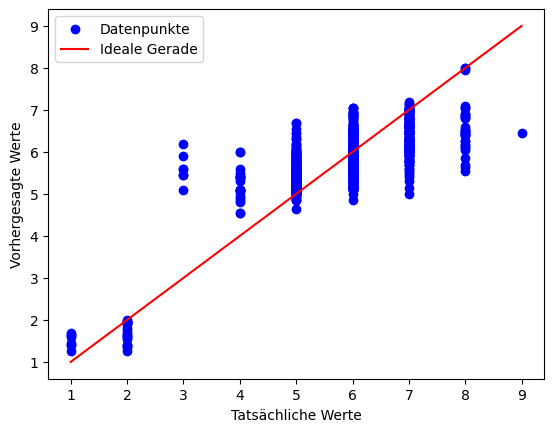

In [179]:
# Vorhersagen für den Bagging-Regressor
bagt2_predictions = bagt2.predict(test_features)

# Scatterplot der tatsächlichen Werte gegen die Vorhersagen
plt.scatter(test_labels, bagt2_predictions, color='blue', label='Datenpunkte')

# Darstellung der idealen Geraden (perfekte Vorhersagen)
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', label='Ideale Gerade')

# Achsenbeschriftungen
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')

# Legende
plt.legend()

# Diagramm anzeigen
plt.show()



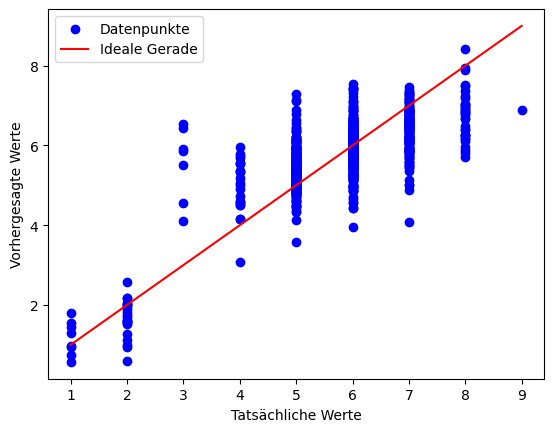

In [180]:
# Plot Gradient-Boosting-Regressor

# Vorhersagen für den Gradient Boosting-Regressor
gbt2_predictions = gbt2.predict(test_features)

# Scatterplot der tatsächlichen Werte gegen die Vorhersagen
plt.scatter(test_labels, gbt2_predictions, color='blue', label='Datenpunkte')

# Darstellung der idealen Geraden (perfekte Vorhersagen)
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', label='Ideale Gerade')

# Achsenbeschriftungen
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')

# Legende
plt.legend()

# Diagramm anzeigen
plt.show()

In [181]:
log

,ID,MAE,R^2,RSME,Modell,Optimierung
0,0,0.5840,0.584,0.756,Lineare Regression,keine
1,1,0.5640,0.604,0.738,Polynomiale Regression,keine
2,3,0.9710,-0.281,1.327,KNeighborsRegressor,"Neighbors=3, leaf_size=20"
3,4,0.9060,-0.126,1.243,KNeighborsRegressor,"Neighbors=5, leaf_size=10"
4,5,0.8720,-0.062,1.210,KNeighborsRegressor,"Neighbors=10, leaf_size=10"
5,6,0.6530,0.241,1.021,DecisionTreeRegressor,Default-Werte
6,7,0.6669,0.356,0.941,DecisionTreeRegressor,"random_state=1, max_depth=5, min_samples_split=3"
7,8,0.5480,0.627,0.716,Gradient Boosted Tree,Default
8,9,0.5280,0.638,0.705,Bagging Tree,Default
9,10,0.5610,0.592,0.748,Gradient Boosted Tree,"n_estimators=200, max_depth=5, learning_rate=0..."
